# Avacado Project

# As we have two task in this problem we will start with Regression for average price

In [1]:
# To start, we will import some libraries that will allow us to explore the dataset and its features.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the dataset

df= pd.read_csv("avocado.csv.zip")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
# We dont required "Unnamed:" Column as we already have deafult index

df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [4]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [5]:
df.tail()

Date  AveragePrice  Total Volume     4046     4225    4770  \
18244  2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [6]:
df.shape

(18249, 13)

In [7]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
# Lets treat date first and change date as date type

df['Date']=pd.to_datetime(df['Date'])
# Now again check the types
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [9]:
# now we will extract date and month from data as we already have year's seprate column in data set

df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [10]:
# Handling Objest using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list=['type','region',]

for i in list:
    df[i]=le.fit_transform(df[i].astype(str))
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[18249 rows x 14 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


In [12]:
df.sample(6)

AveragePrice  Total Volume         4046         4225       4770  \
6421           1.75    2247856.71    444286.92    806545.92  170360.42   
8356           1.23   35182320.78  12311055.17  10069354.29  650017.26   
2051           1.04     124246.77     48761.54     41554.57     110.24   
718            1.01     278695.29     97420.10     29942.92   46763.06   
3148           1.01    6506234.86   2597934.17   1869930.06  328653.80   
10518          1.64       3813.70       297.71      2408.67      51.68   

        Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  \
6421     826663.45   555284.70   257991.63     13387.12     0  2017      15   
8356   12151894.06  9399104.79  2544942.74    207846.53     0  2017      51   
2051      33820.42    33820.42        0.00         0.00     0  2015      39   
718      104569.21    99704.49      473.70      4391.02     0  2015      13   
3148    1709716.83  1571460.04   110755.40     27501.39     0  2016       6   
10518      1055.64      306.67      748.97         0.00     1  2015      26   

       Month  Day  
6421      10   22  
8356       4   16  
2051       7   19  
718        3    8  
3148       6   12  
10518      3   22

In [13]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [36]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [37]:
df.loc[df['AveragePrice']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

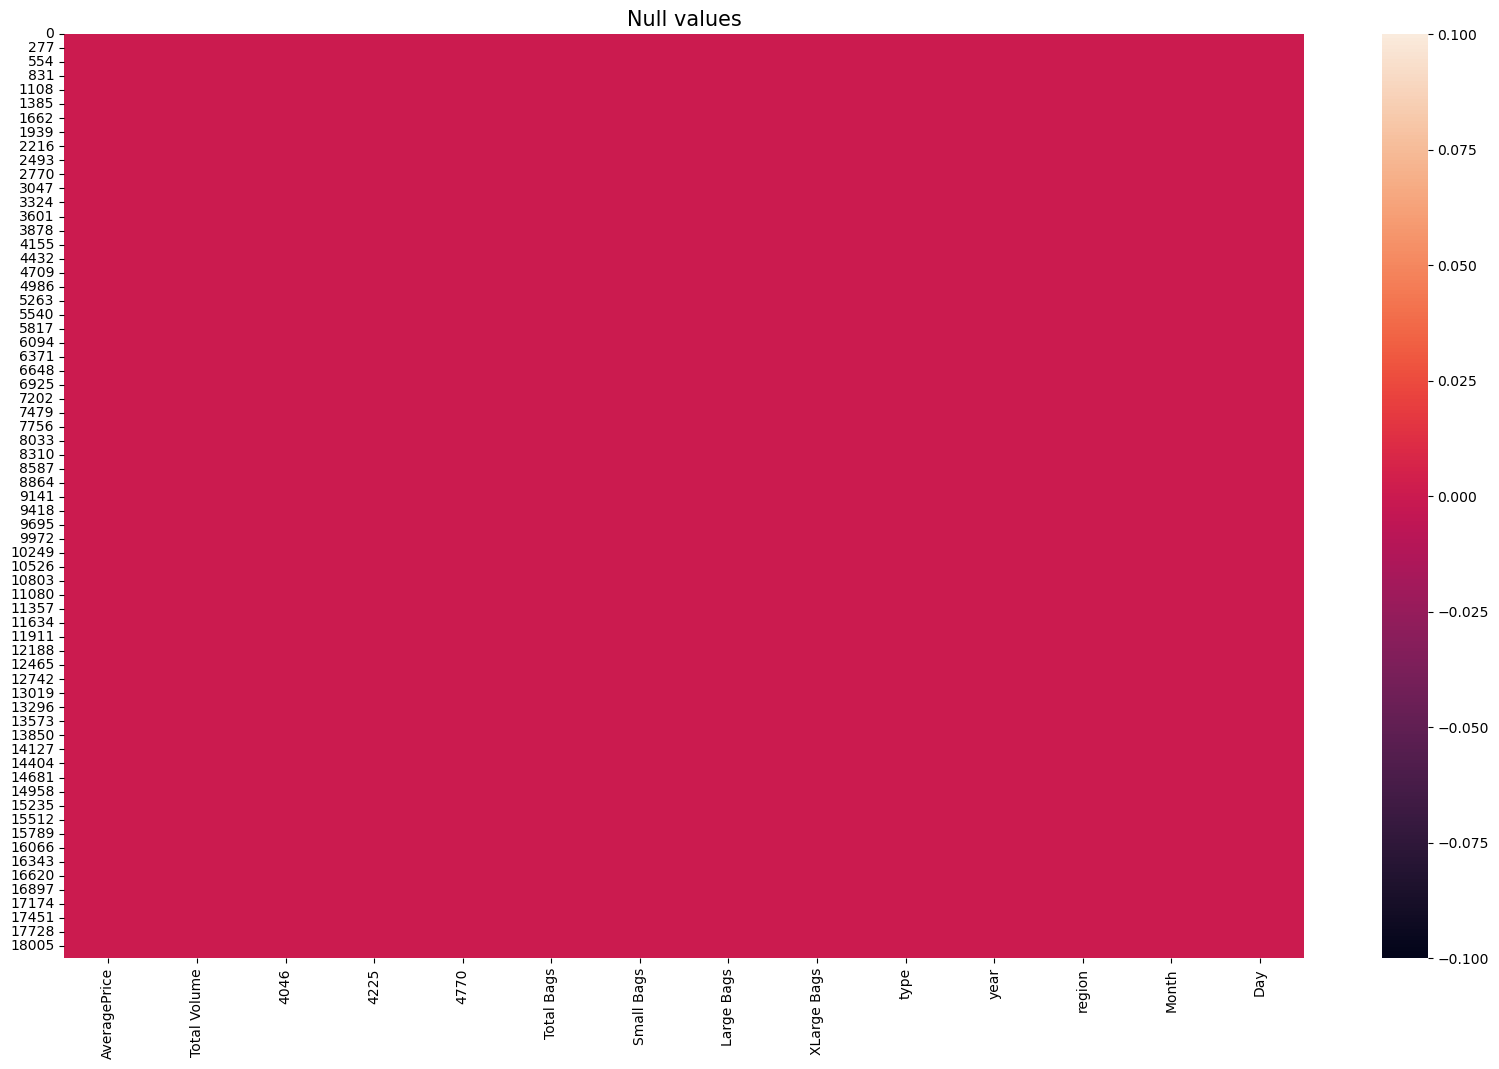

In [38]:
plt.figure(figsize=(20,12))
plt.title("Null values",fontsize=15)
sns.heatmap(df.isnull());

<AxesSubplot:>

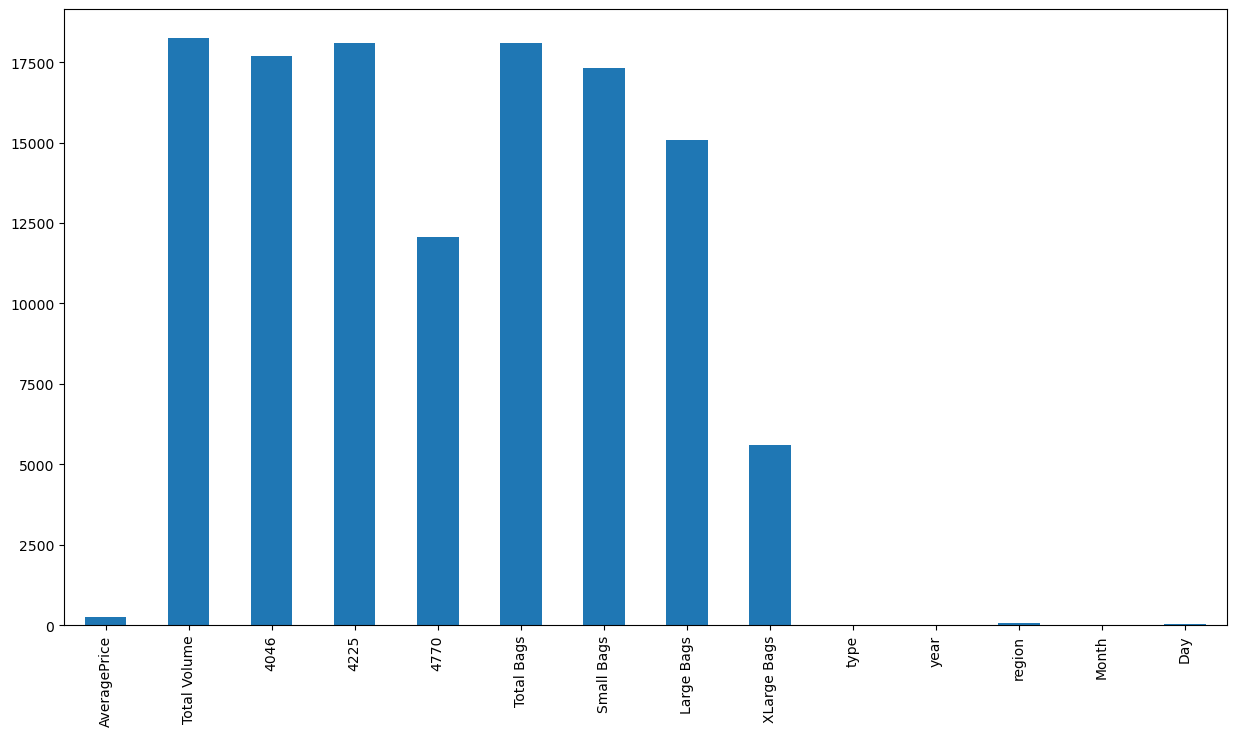

In [39]:
count = df.nunique()

plt.figure(figsize=(15,8))
count.plot(kind='bar')

In [40]:
Missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)
Missing_percentage[:13]

AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
Month           0.0
dtype: float64

<AxesSubplot:xlabel='type', ylabel='count'>

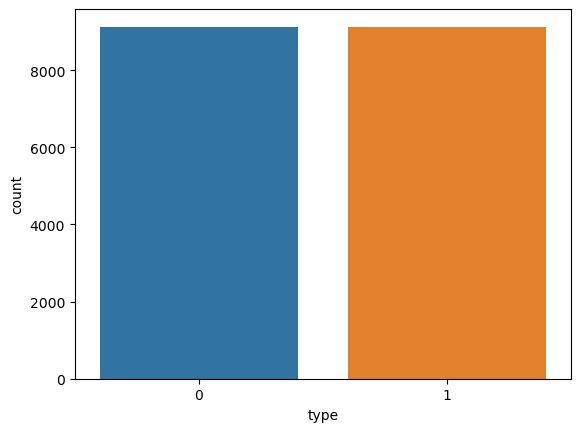

In [41]:
sns.countplot(x='type',data=df)

We can see type is equally distributied

We can see that type has almost same count of data which means equally distributted

<AxesSubplot:xlabel='year', ylabel='count'>

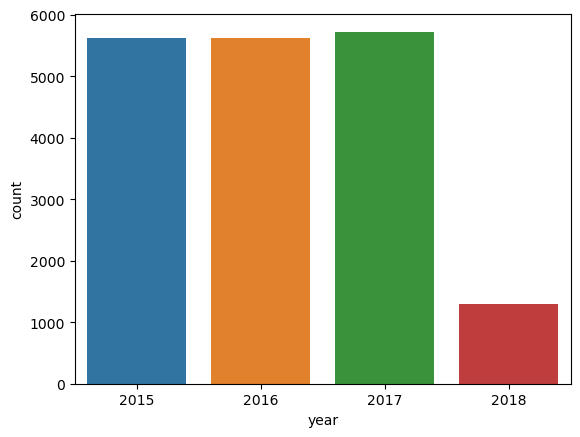

In [42]:
sns.countplot(x='year',data=df)

Here we can see that all year are contributing alsmost equal count but 2018 has less because data was collected in 2018 so there might be chances it was collected before year ends

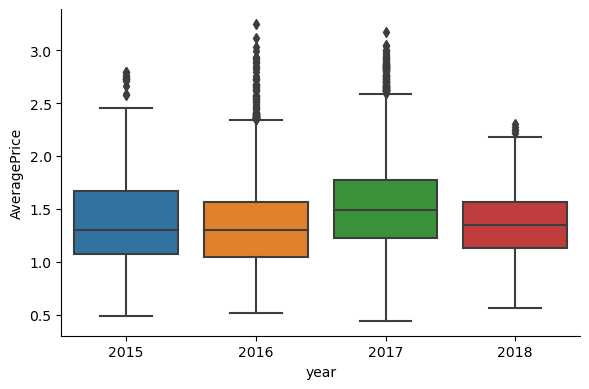

In [43]:
sns.catplot(x='year', y = 'AveragePrice', 
            data = df,
            kind = 'box',
            height = 4,
            aspect=1.5)

As we can see yearly Average price where 2017 has highest price and and 2016 and 2018 was almost same level

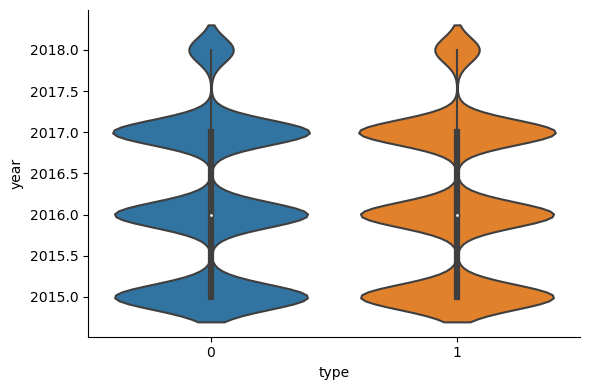

In [44]:
sns.catplot(x='type',
            y='year',
            data=df,
            height=4,aspect=1.5,
            kind='violin')

We can see type is equally distributed in all years which mean both type has equal demand in market.

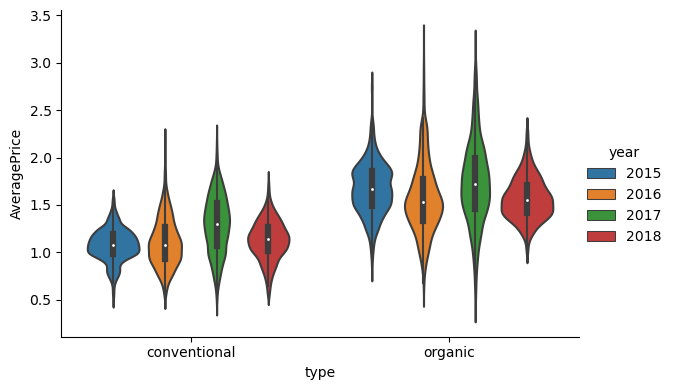

In [46]:
# Importing original data set just to visulize encoded objest with origianl names
df2=pd.read_csv("avocado.csv.zip")

sns.catplot(x='type',
            y='AveragePrice', 
            data=df2,
            hue='year',
            height=4,aspect=1.5,
            kind='violin')

We can see that buyers preferred Organic Avacado as compare to concentional. Consumers are health concious and they like to buy healthy and eat healthy

Also we can see rates are high for Organic Avacado than Conentional which is clearly impact of demand and supply rule. As Organic Avacado has high demand price is also high.

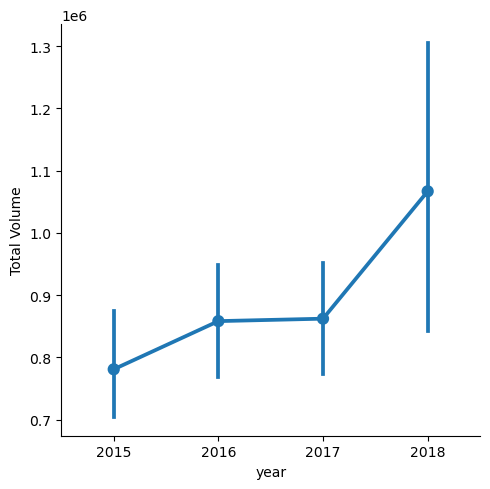

In [47]:
sns.catplot(x="year",
            y="Total Volume",
            
            kind="point", 
            data=df2)

We can see that Total valume is increaseing year by year

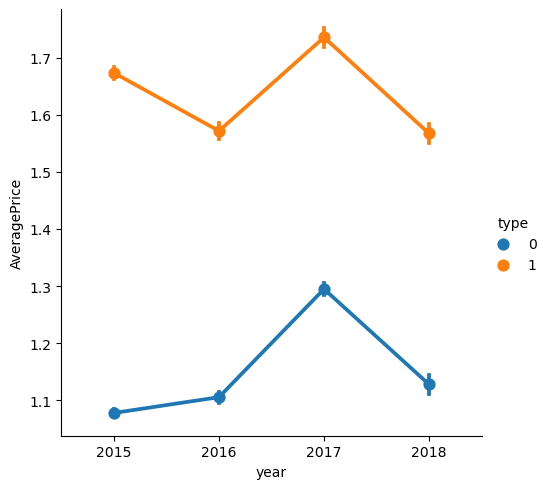

In [48]:
sns.catplot(x="year",
            y="AveragePrice",
            hue="type",
            kind="point", 
            data=df)

We can see that price wason high sight in 2017 for both type. and Organic was always high compare to other type

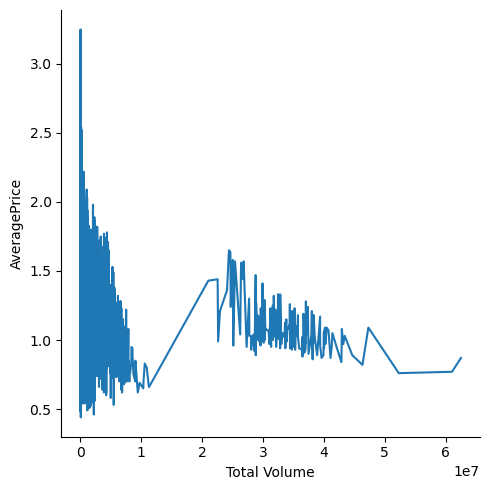

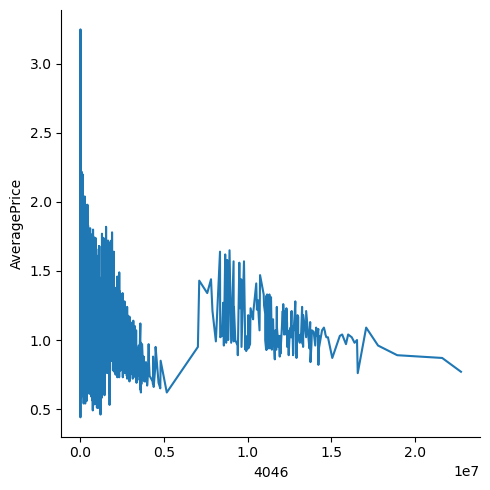

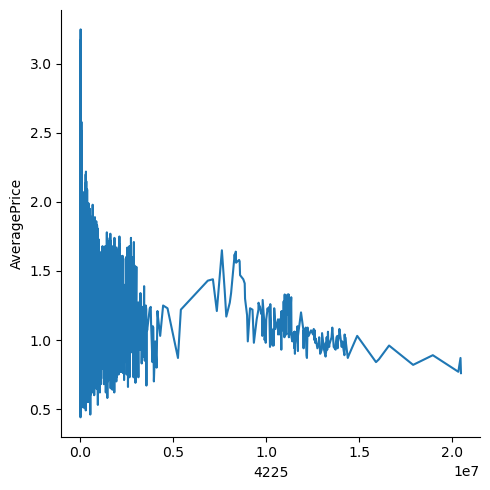

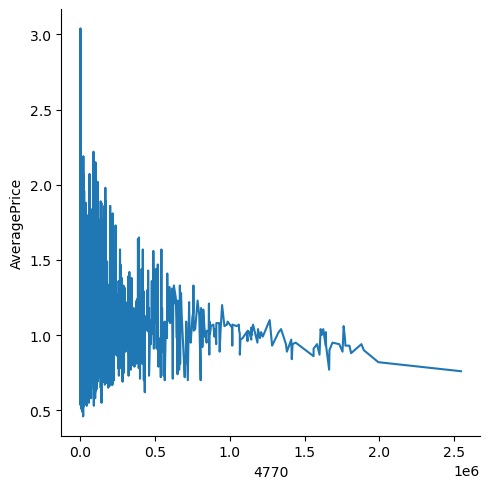

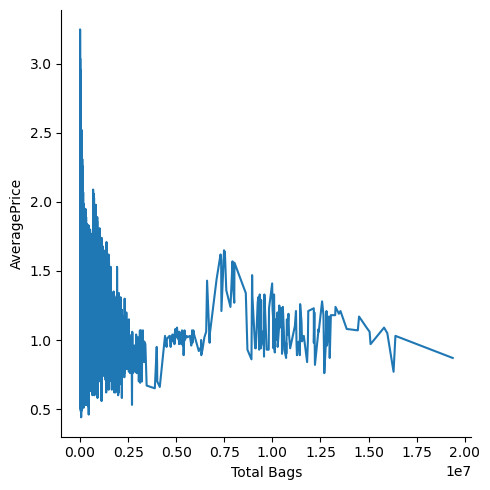

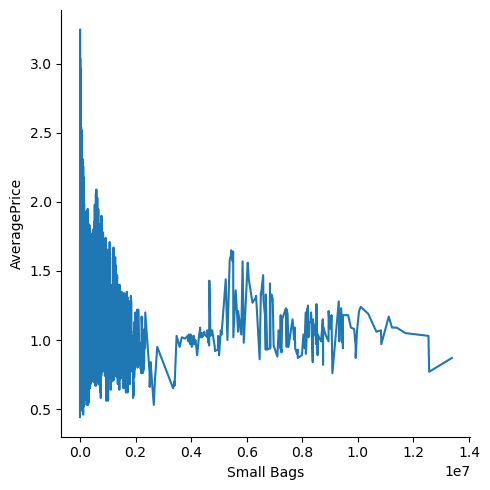

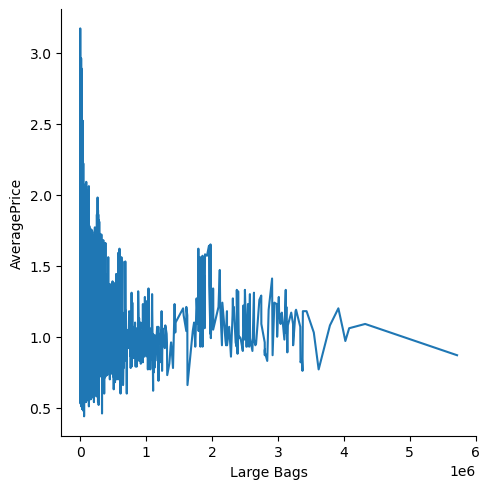

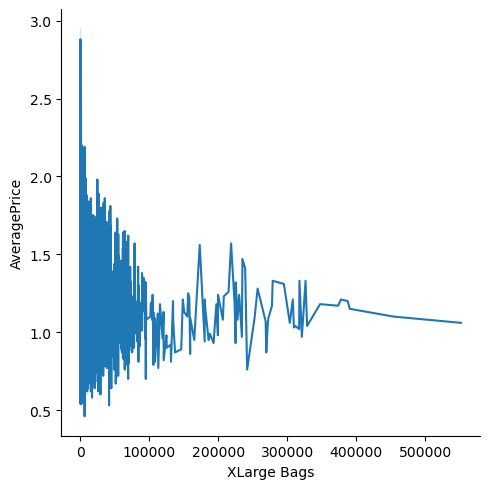

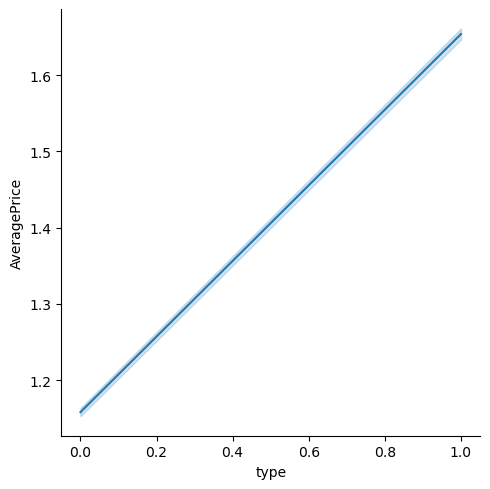

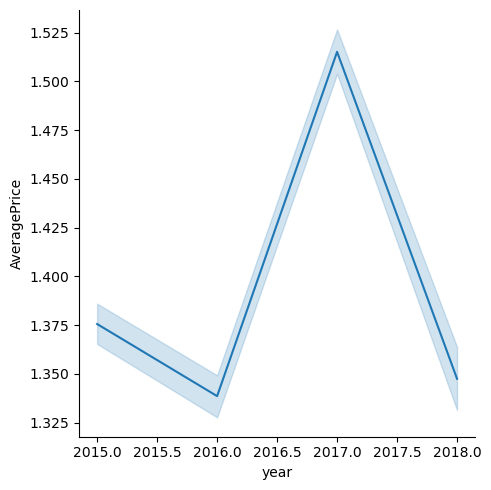

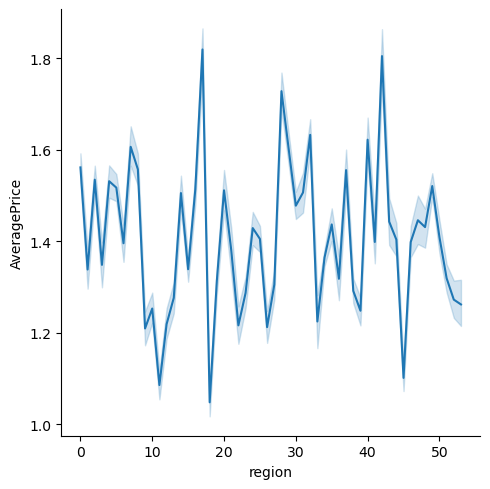

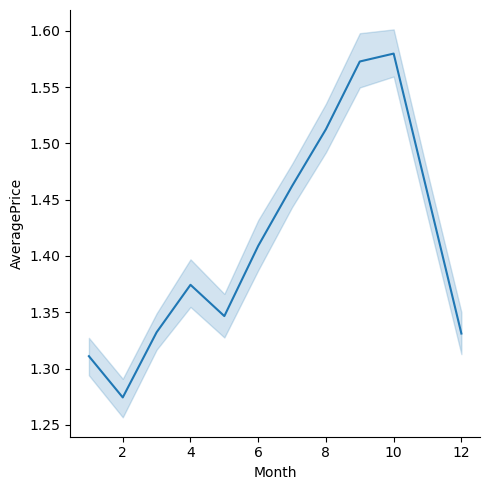

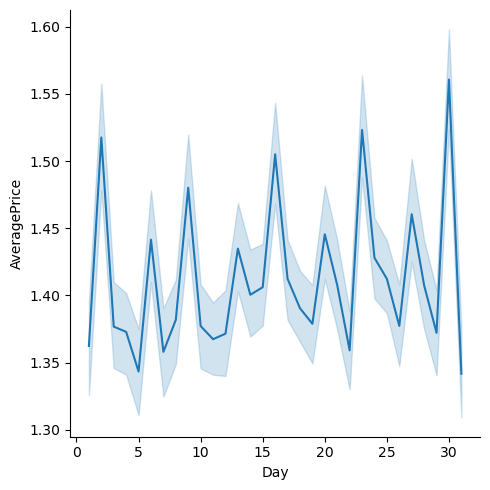

In [49]:
index = 0
features = df.drop("AveragePrice", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="AveragePrice", kind="line", data=df)
    index += 1
plt.show()

Below are the some observations for importatnt features

Totla Volume doest have positve or negative impact. it looks parallel line

4046,4225,4770 for three of them almost equal lines

Xlarge Bag shows postive signle very slighlty

For all other coloumns there is no relatiive observation

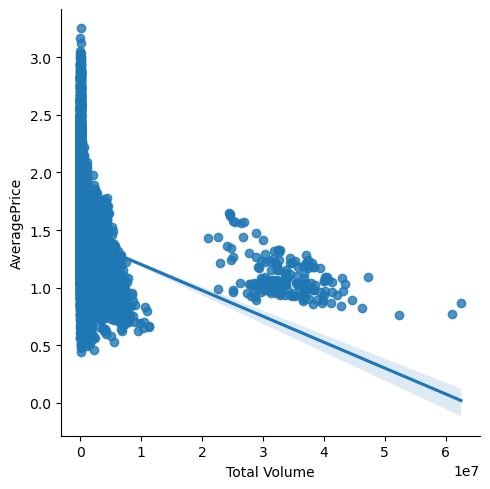

In [50]:
sns.lmplot(x="Total Volume", y="AveragePrice", data=df)

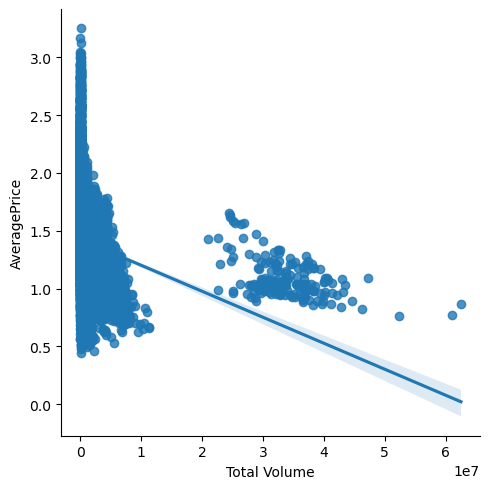

In [51]:
sns.lmplot(x="Total Volume", y="AveragePrice", data=df)

Volume and Average price has negative realtion price increases then volumne decreases whuch is normal

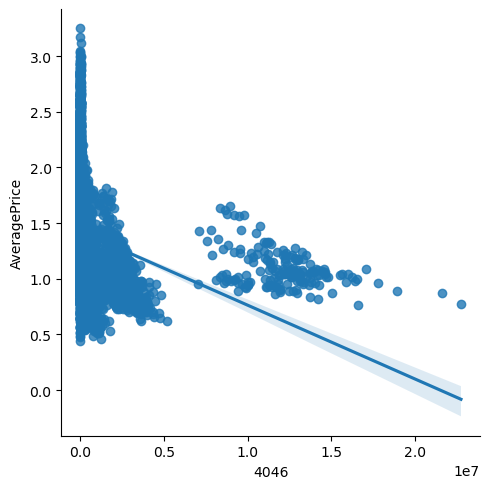

In [52]:
sns.lmplot(x="4046", y="AveragePrice", data=df)

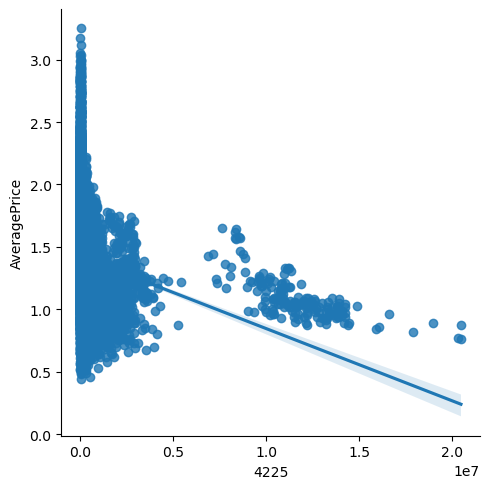

In [53]:
sns.lmplot(x="4225", y="AveragePrice", data=df)

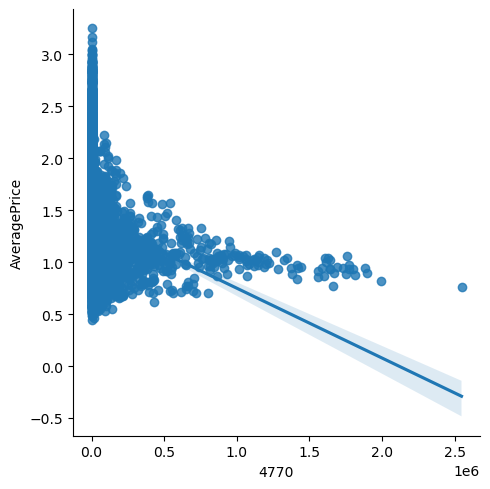

In [54]:
sns.lmplot(x="4770", y="AveragePrice", data=df)

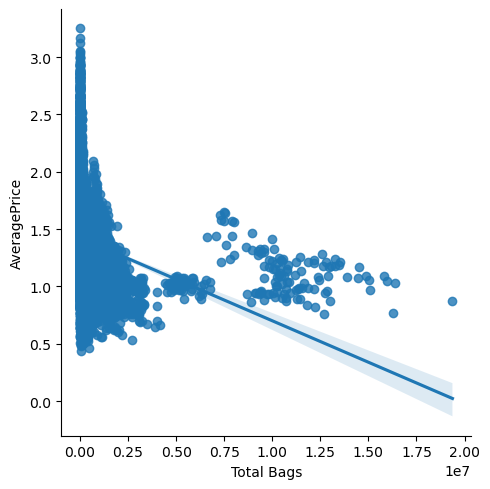

In [55]:
sns.lmplot(x="Total Bags", y="AveragePrice", data=df)

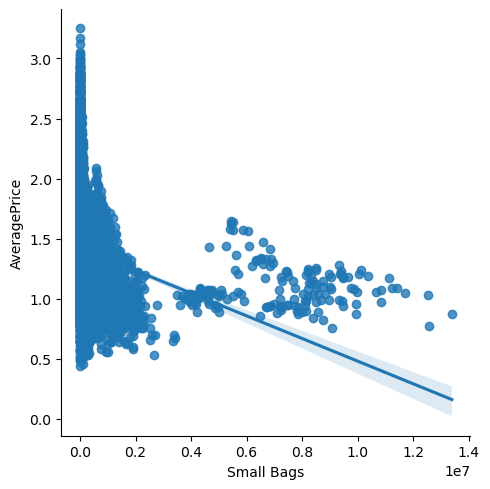

In [56]:
sns.lmplot(x="Small Bags", y="AveragePrice", data=df)

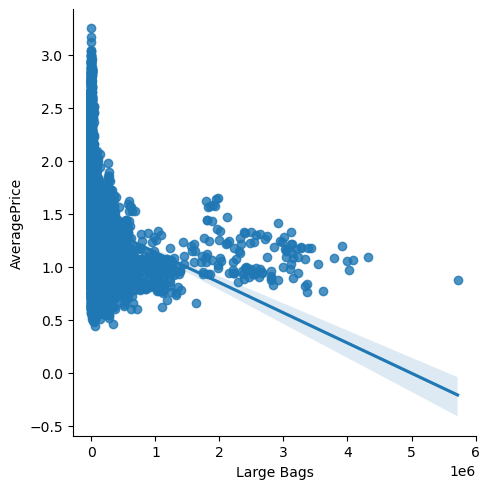

In [57]:
sns.lmplot(x="Large Bags", y="AveragePrice", data=df)

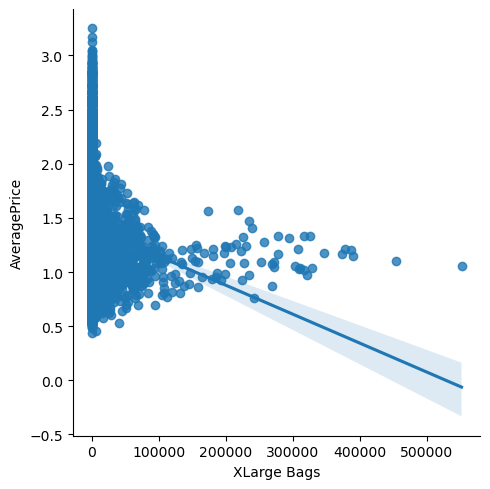

In [58]:
sns.lmplot(x="XLarge Bags", y="AveragePrice", data=df)

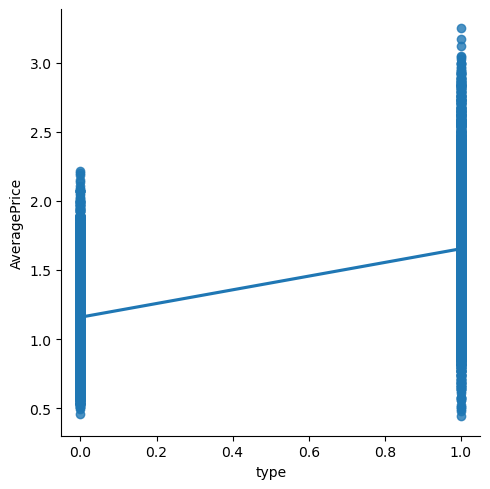

In [59]:
sns.lmplot(x="type", y="AveragePrice", data=df)

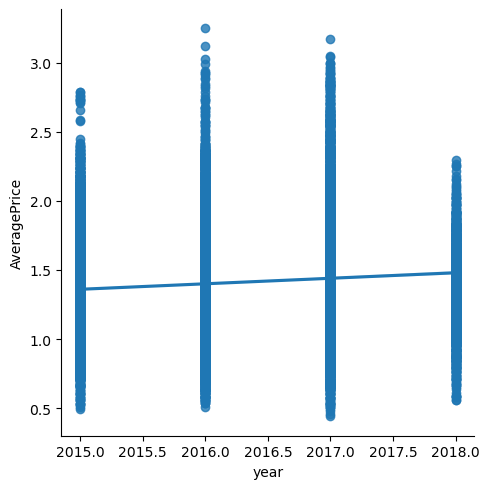

In [60]:
sns.lmplot(x="year", y="AveragePrice", data=df)

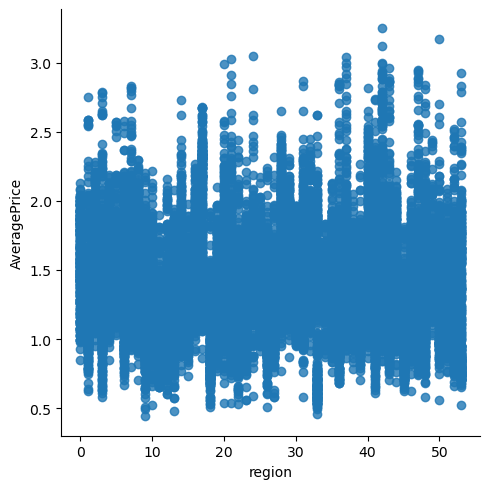

In [61]:
sns.lmplot(x="region", y="AveragePrice", data=df)

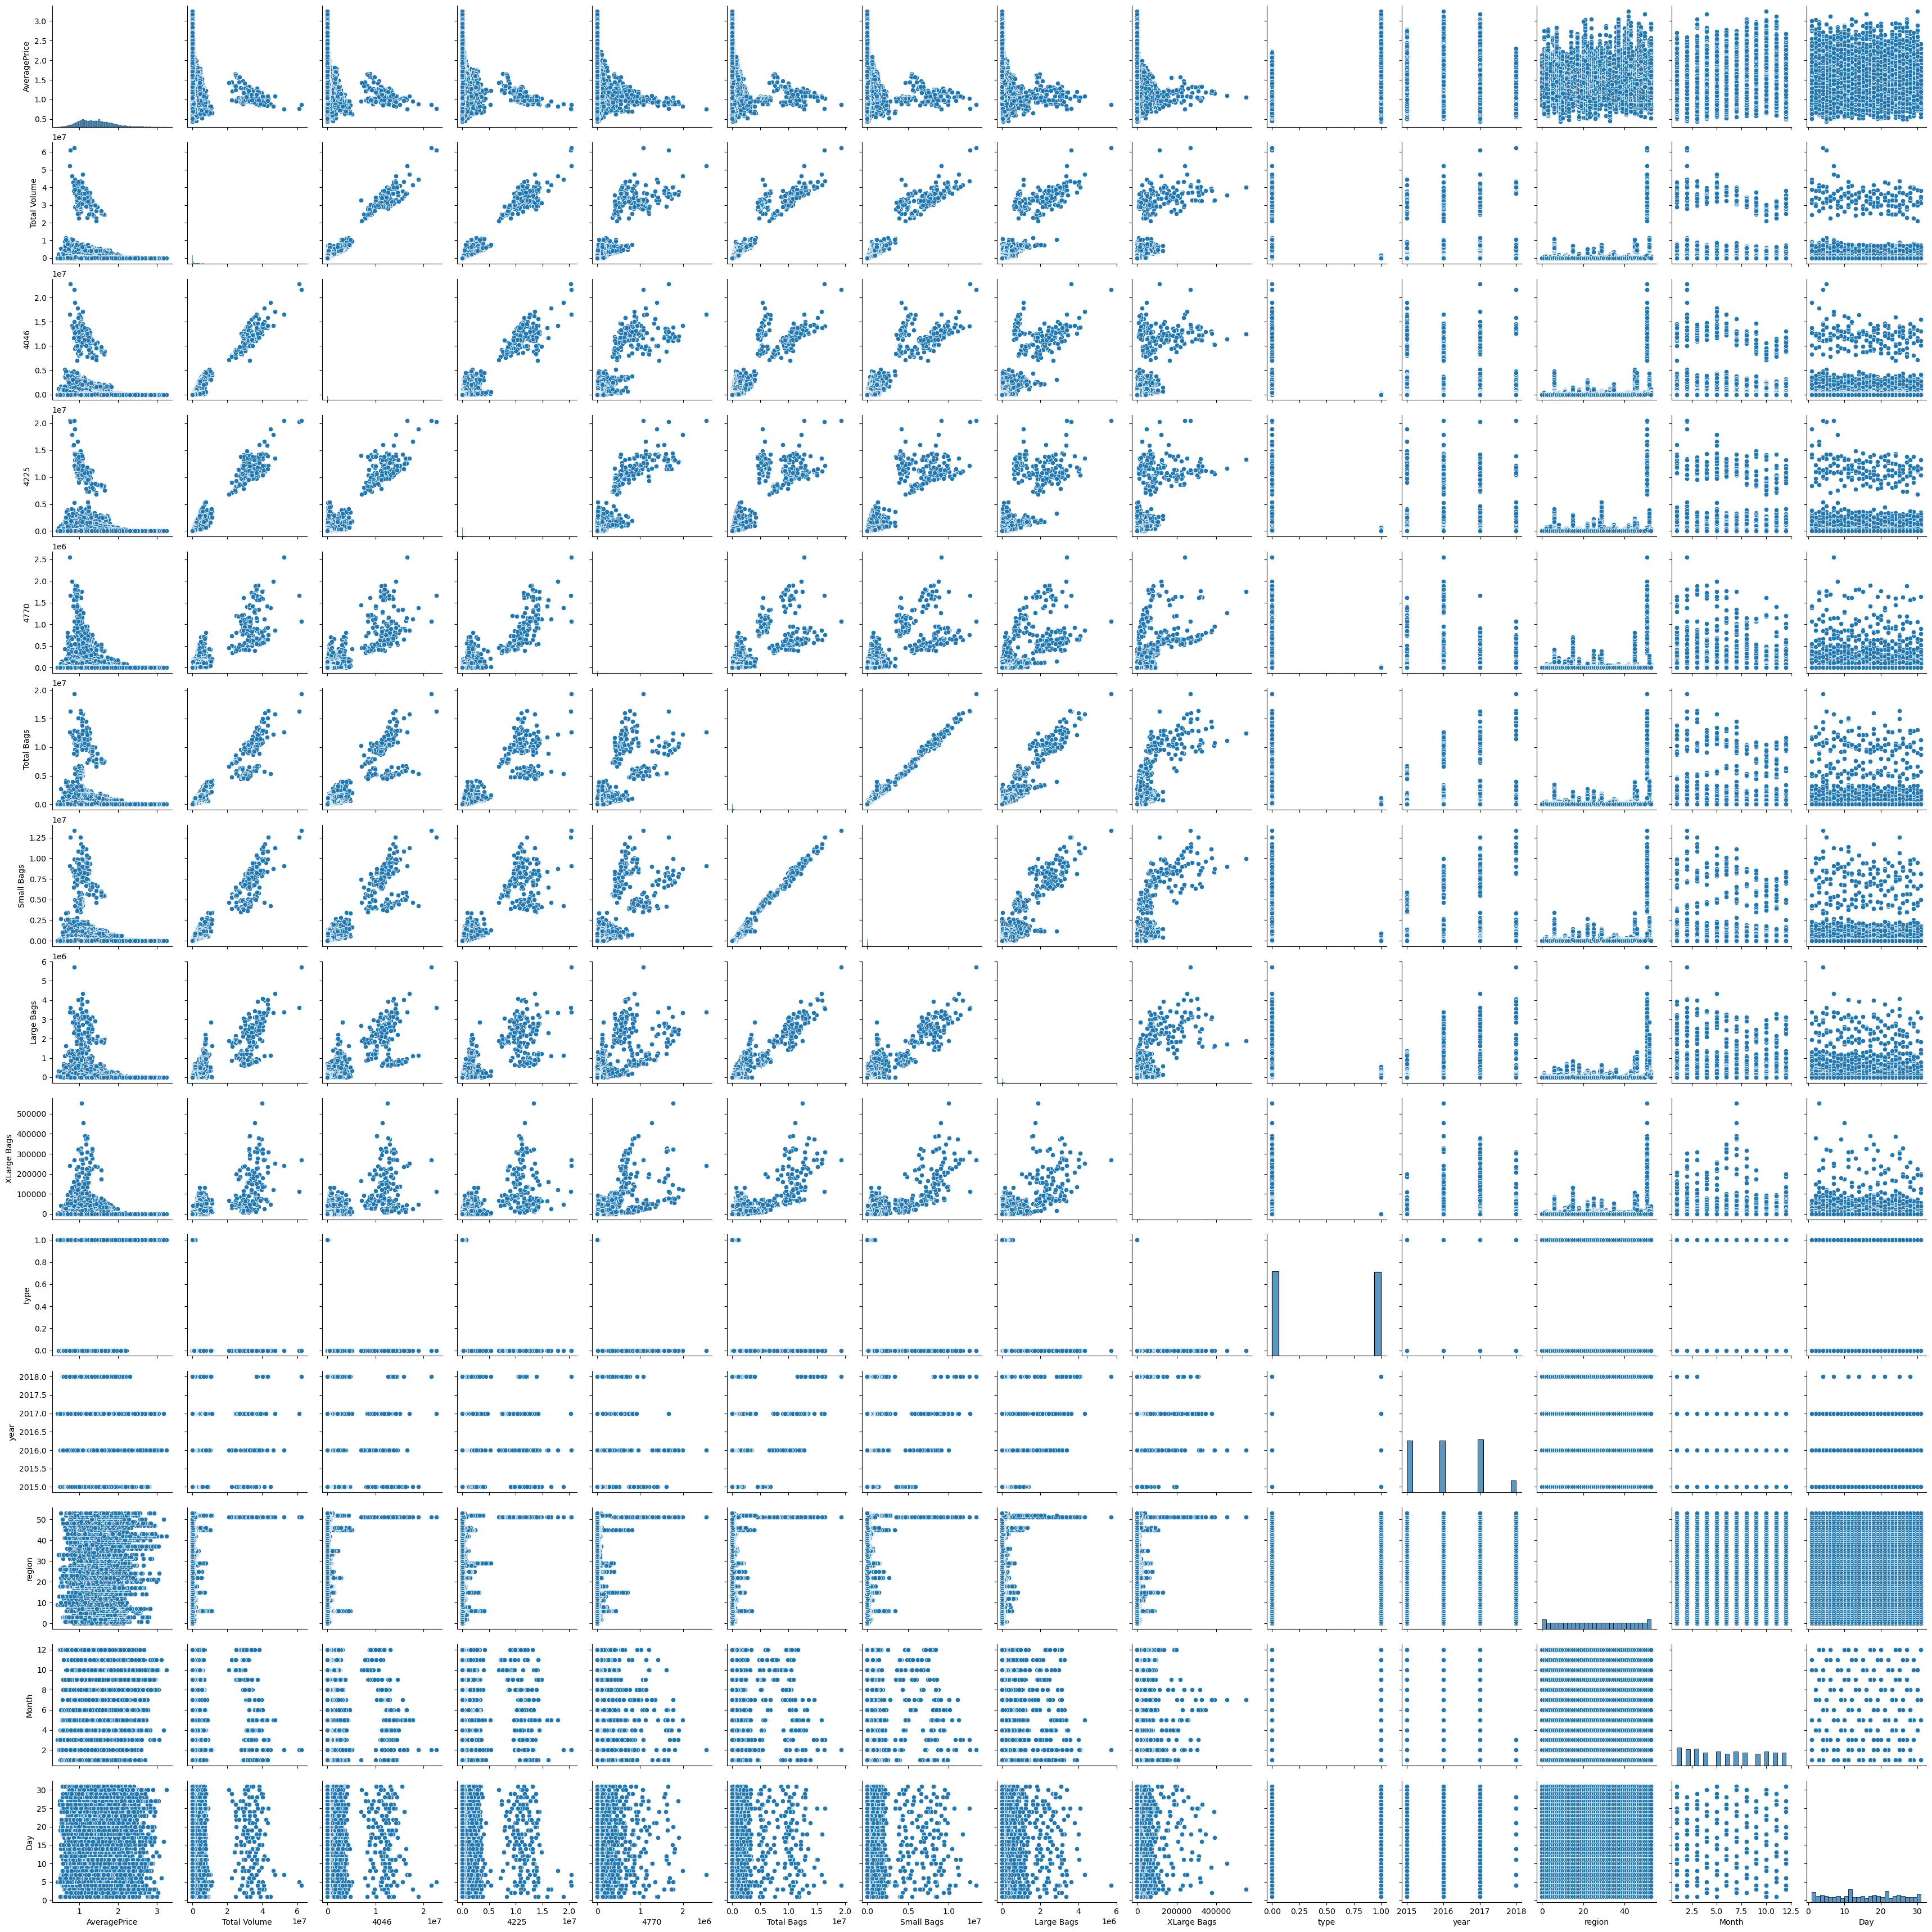

In [62]:
sns.pairplot(df)

I see that almost non of them are positively impacting to Average price hence we will have to take more care while selectiong final features

# Descriptive statistics

In [63]:
df.describe().T

count           mean           std      min       25%  \
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
type          18249.0       0.499918  5.000137e-01     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   
region        18249.0      26.495644  1.558379e+01     0.00     13.00   
Month         18249.0       6.177215  3.534130e+00     1.00      3.00   
Day           18249.0      15.662612  8.776281e+00     1.00      8.00   

                    50%        75%          max  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
type               0.00       1.00         1.00  
year            2016.00    2017.00      2018.00  
region            26.00      40.00        53.00  
Month              6.00       9.00        12.00  
Day               16.00      23.00        31.00

We can observe from above stats that there are more chances of having outliers in Bags, Volumn because difference between 75% and max is very high

In [64]:
# Checking correlation for all colouns

df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
Day            -0.004988   -0.003870   -0.008352     0.000319 -0.000013   

                  year    region     Month       Day  
AveragePrice  0.093197 -0.011716  0.162409  0.027386  
Total Volume  0.017193  0.174176 -0.024689 -0.009747  
4046          0.003353  0.192073 -0.025803 -0.010159  
4225         -0.009559  0.145726 -0.022108 -0.012393  
4770         -0.036531  0.095252 -0.033424 -0.009009  
Total Bags    0.071552  0.175256 -0.022724 -0.004988  
Small Bags    0.063915  0.164702 -0.023126 -0.003870  
Large Bags    0.087891  0.198768 -0.020187 -0.008352  
XLarge Bags   0.081033  0.082281 -0.012969  0.000319  
type         -0.000032 -0.000280 -0.000085 -0.000013  
year          1.000000 -0.000055 -0.177050  0.004475  
region       -0.000055  1.000000 -0.000144 -0.000021  
Month        -0.177050 -0.000144  1.000000  0.010621  
Day           0.004475 -0.000021  0.010621  1.000000

As very already observed in previouls pair plot almost all coloumns have negative relation with Average price

<AxesSubplot:>

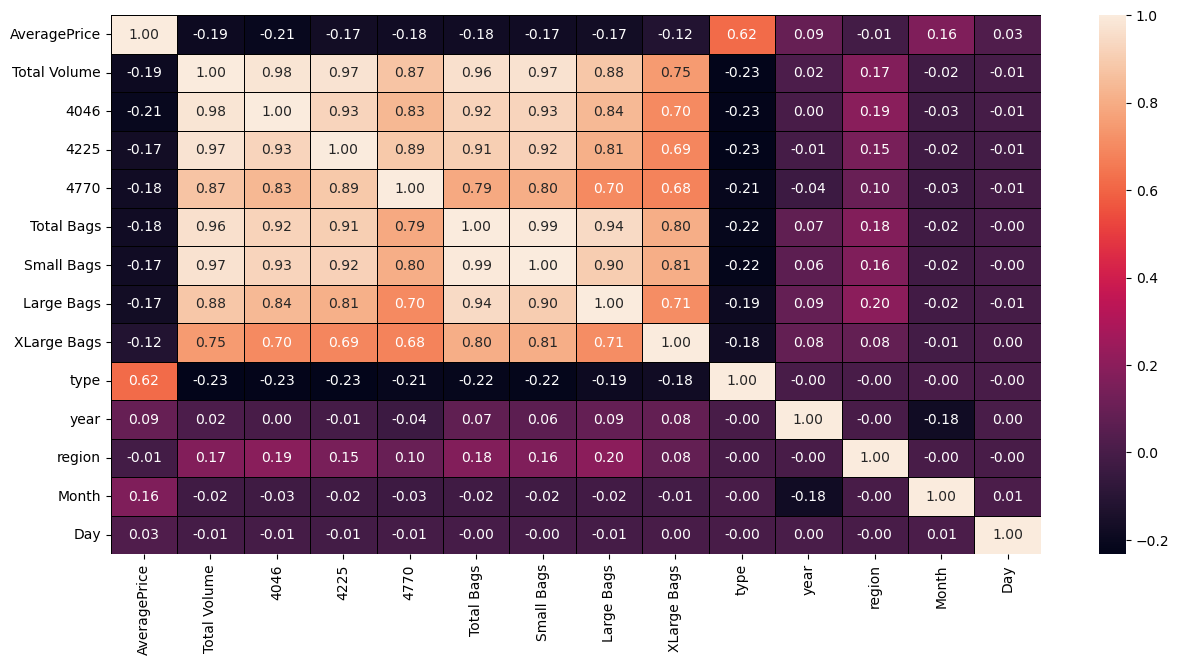

In [65]:
# we will plot all aboev values on hitmap just for good visualisation

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

We can say that almost 80% features are negatively correlated and only Day,month and Region has some postive realtion

We can drop day coloumn as it is having very less realtion

If we see correlation of all features with each other they have very lesss relation

Heat map conatins more off negative correaltions

There are some coloumns which will create multicolinarity like Bags and Three integers Numbers which we will handle through VIF

In [66]:
df.drop("Day",axis=1,inplace=True)
df.corr()['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.615845
Month           0.162409
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

same numbering just to look out ralation of all features with averageprice in decending.

# Outliers Checking in Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

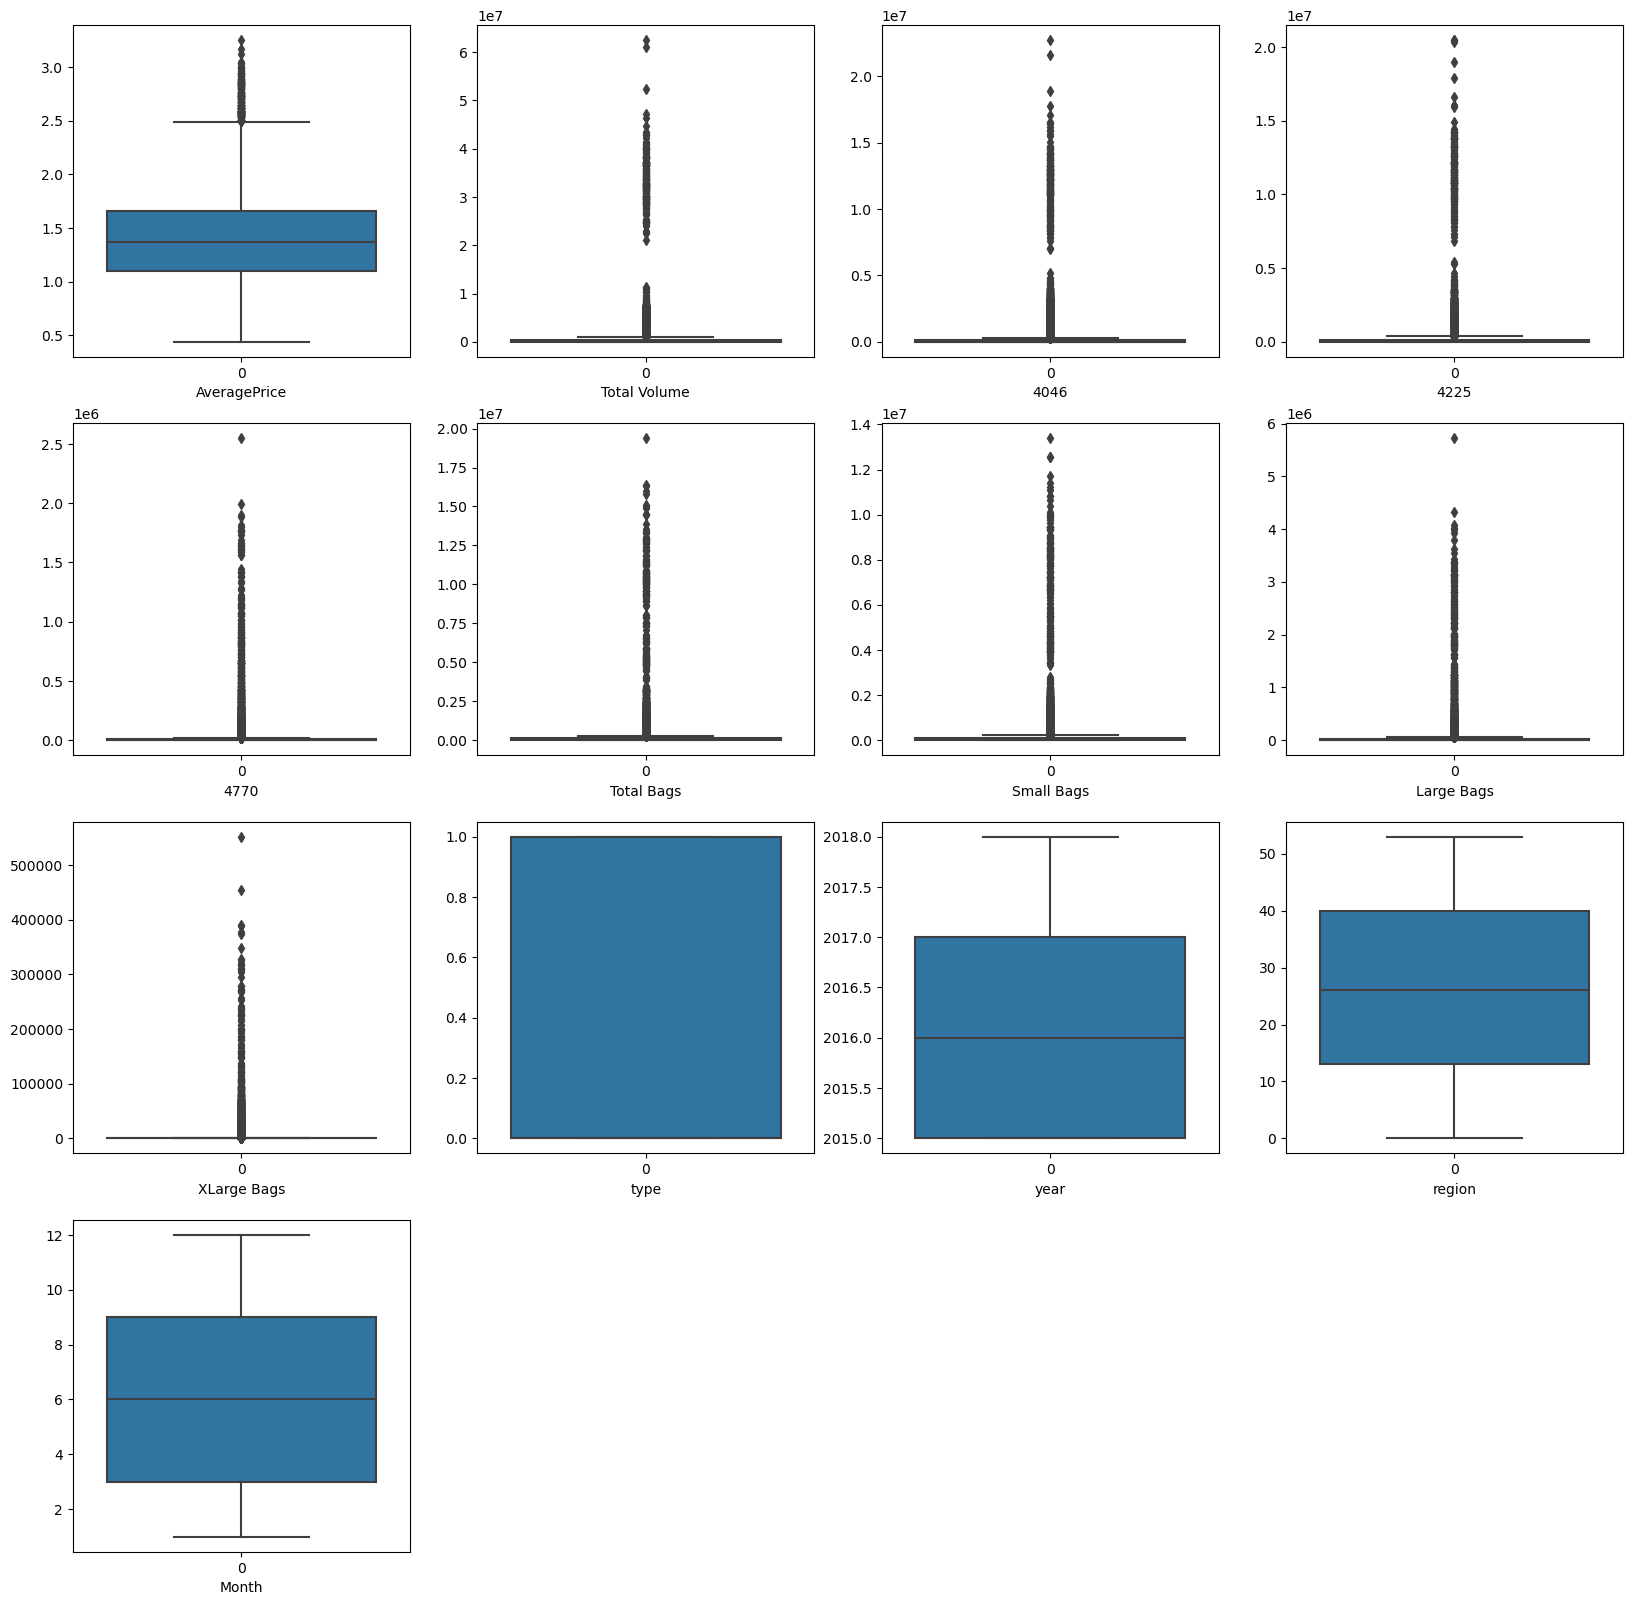

In [67]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=13:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

As we observed in descriptive stats, so many columns has outliers

In [68]:
# Lets Treat outliers

from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]
z.shape

(17651, 13)

In [69]:
df.shape

(18249, 13)

In [70]:
loss=(18249-17651)/18249*100
loss

3.276891884486821

Not much data loss we can bear 3 % loss

In [71]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([  346,   359,   780,   781,   783,   787,   788,   790,   791,
              792,
            ...
            17250, 17251, 17255, 17300, 17301, 17302, 17303, 17304, 17402,
            17428],
           dtype='int64', length=598)

In [72]:
df.drop(dropindex,inplace=True)
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  
0         8603.62       93.25          0.0     0  2015       0     12  
1         9408.07       97.49          0.0     0  2015       0     12  
2         8042.21      103.14          0.0     0  2015       0     12  
3         5677.40      133.76          0.0     0  2015       0     12  
4         5986.26      197.69          0.0     0  2015       0     11  
...           ...         ...          ...   ...   ...     ...    ...  
18244    13066.82      431.85          0.0     1  2018      53      2  
18245     8940.04      324.80          0.0     1  2018      53      1  
18246     9351.80       42.31          0.0     1  2018      53      1  
18247    10919.54       50.00          0.0     1  2018      53      1  
18248    11988.14       26.01          0.0     1  2018      53      1  

[17651 rows x 13 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

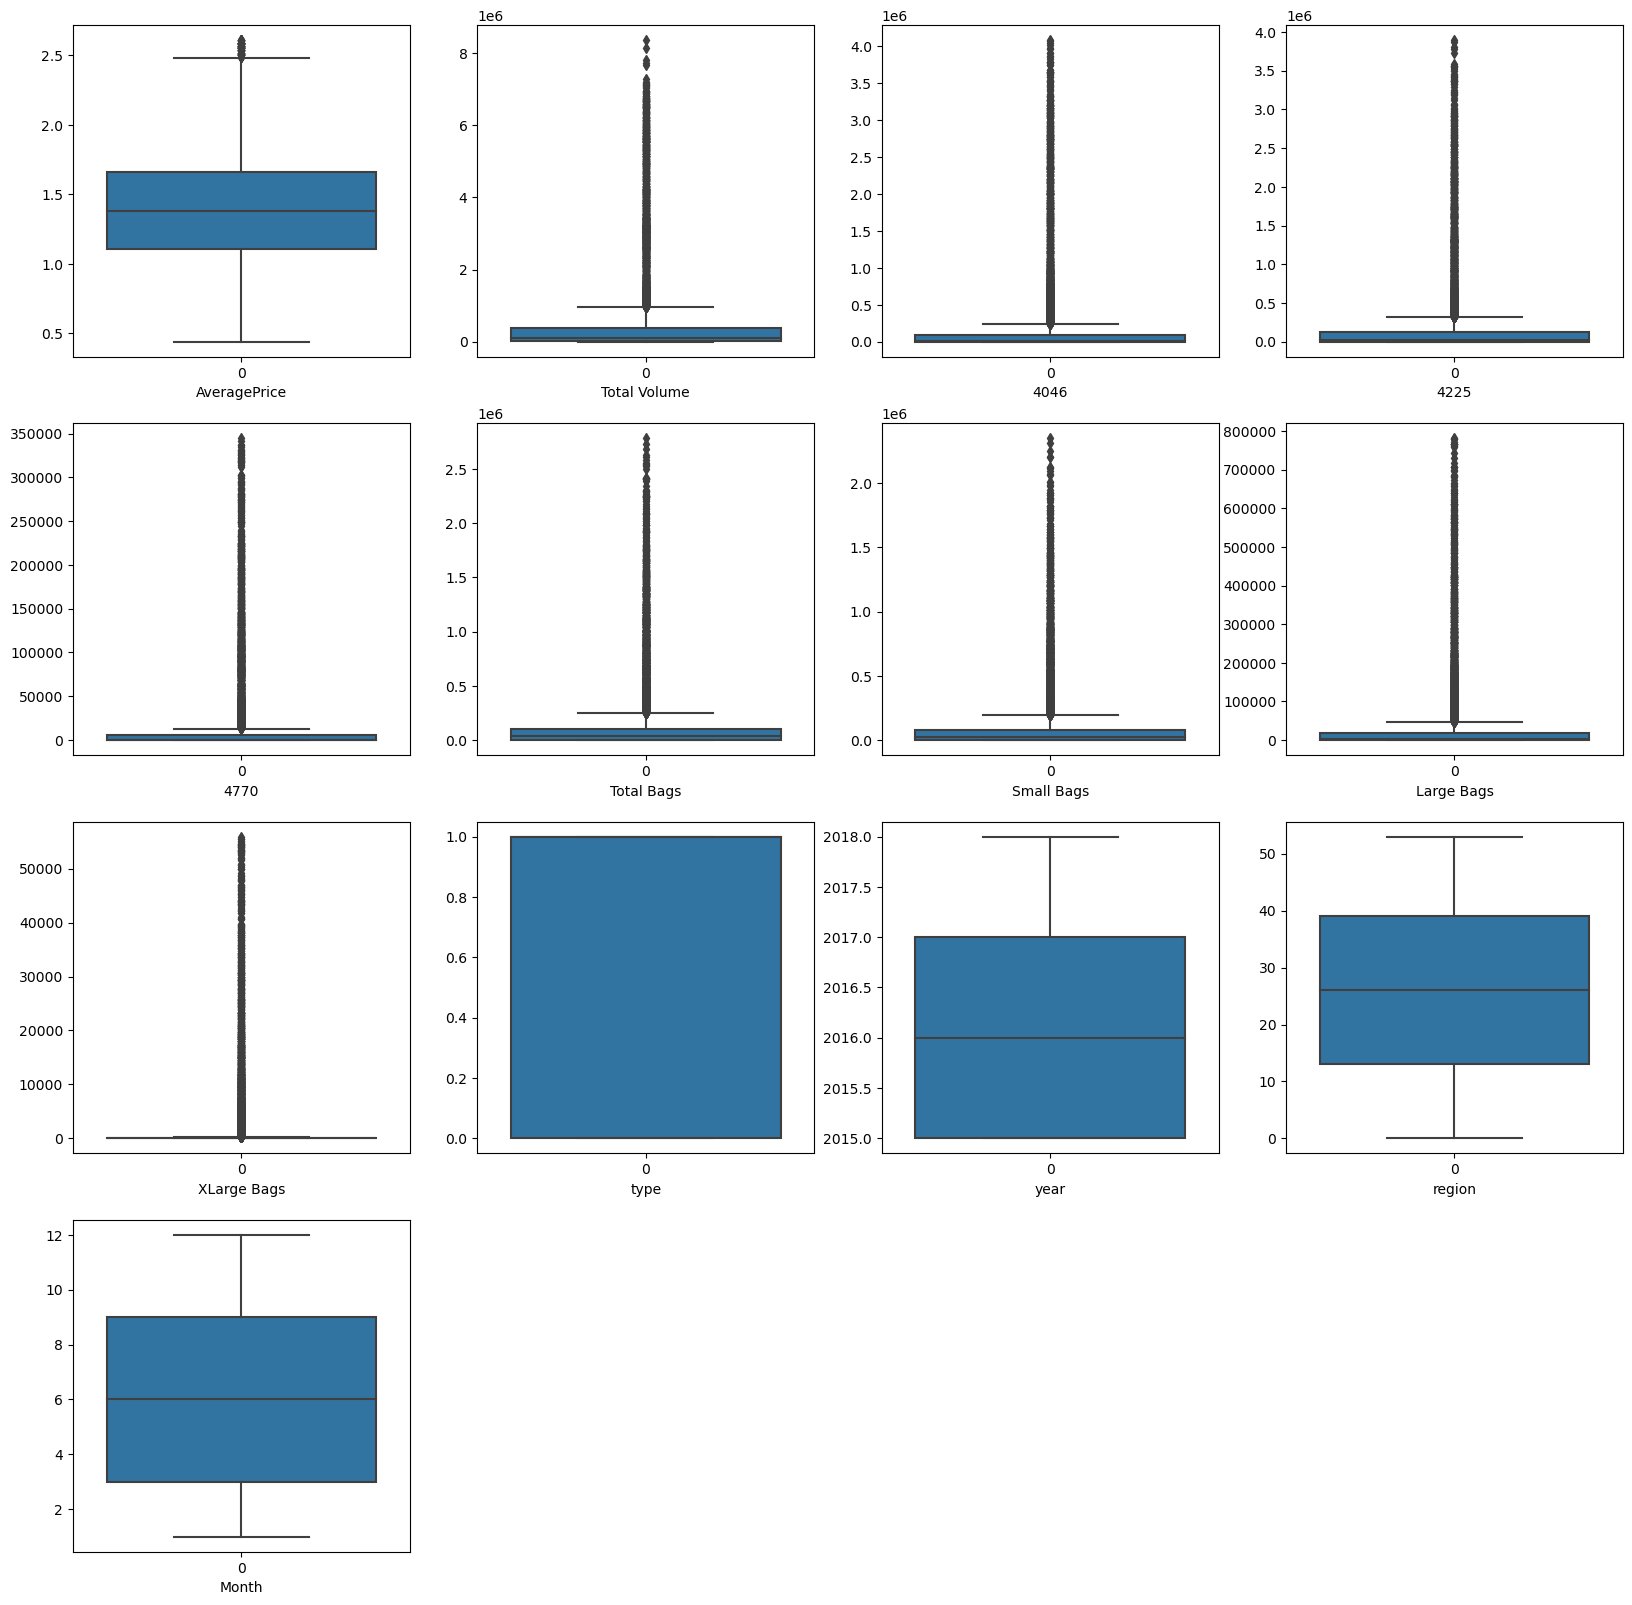

In [73]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=13:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

# We should check skewness of data before processing

In [74]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

So much skewed data is present in set

<function matplotlib.pyplot.show(close=None, block=None)>

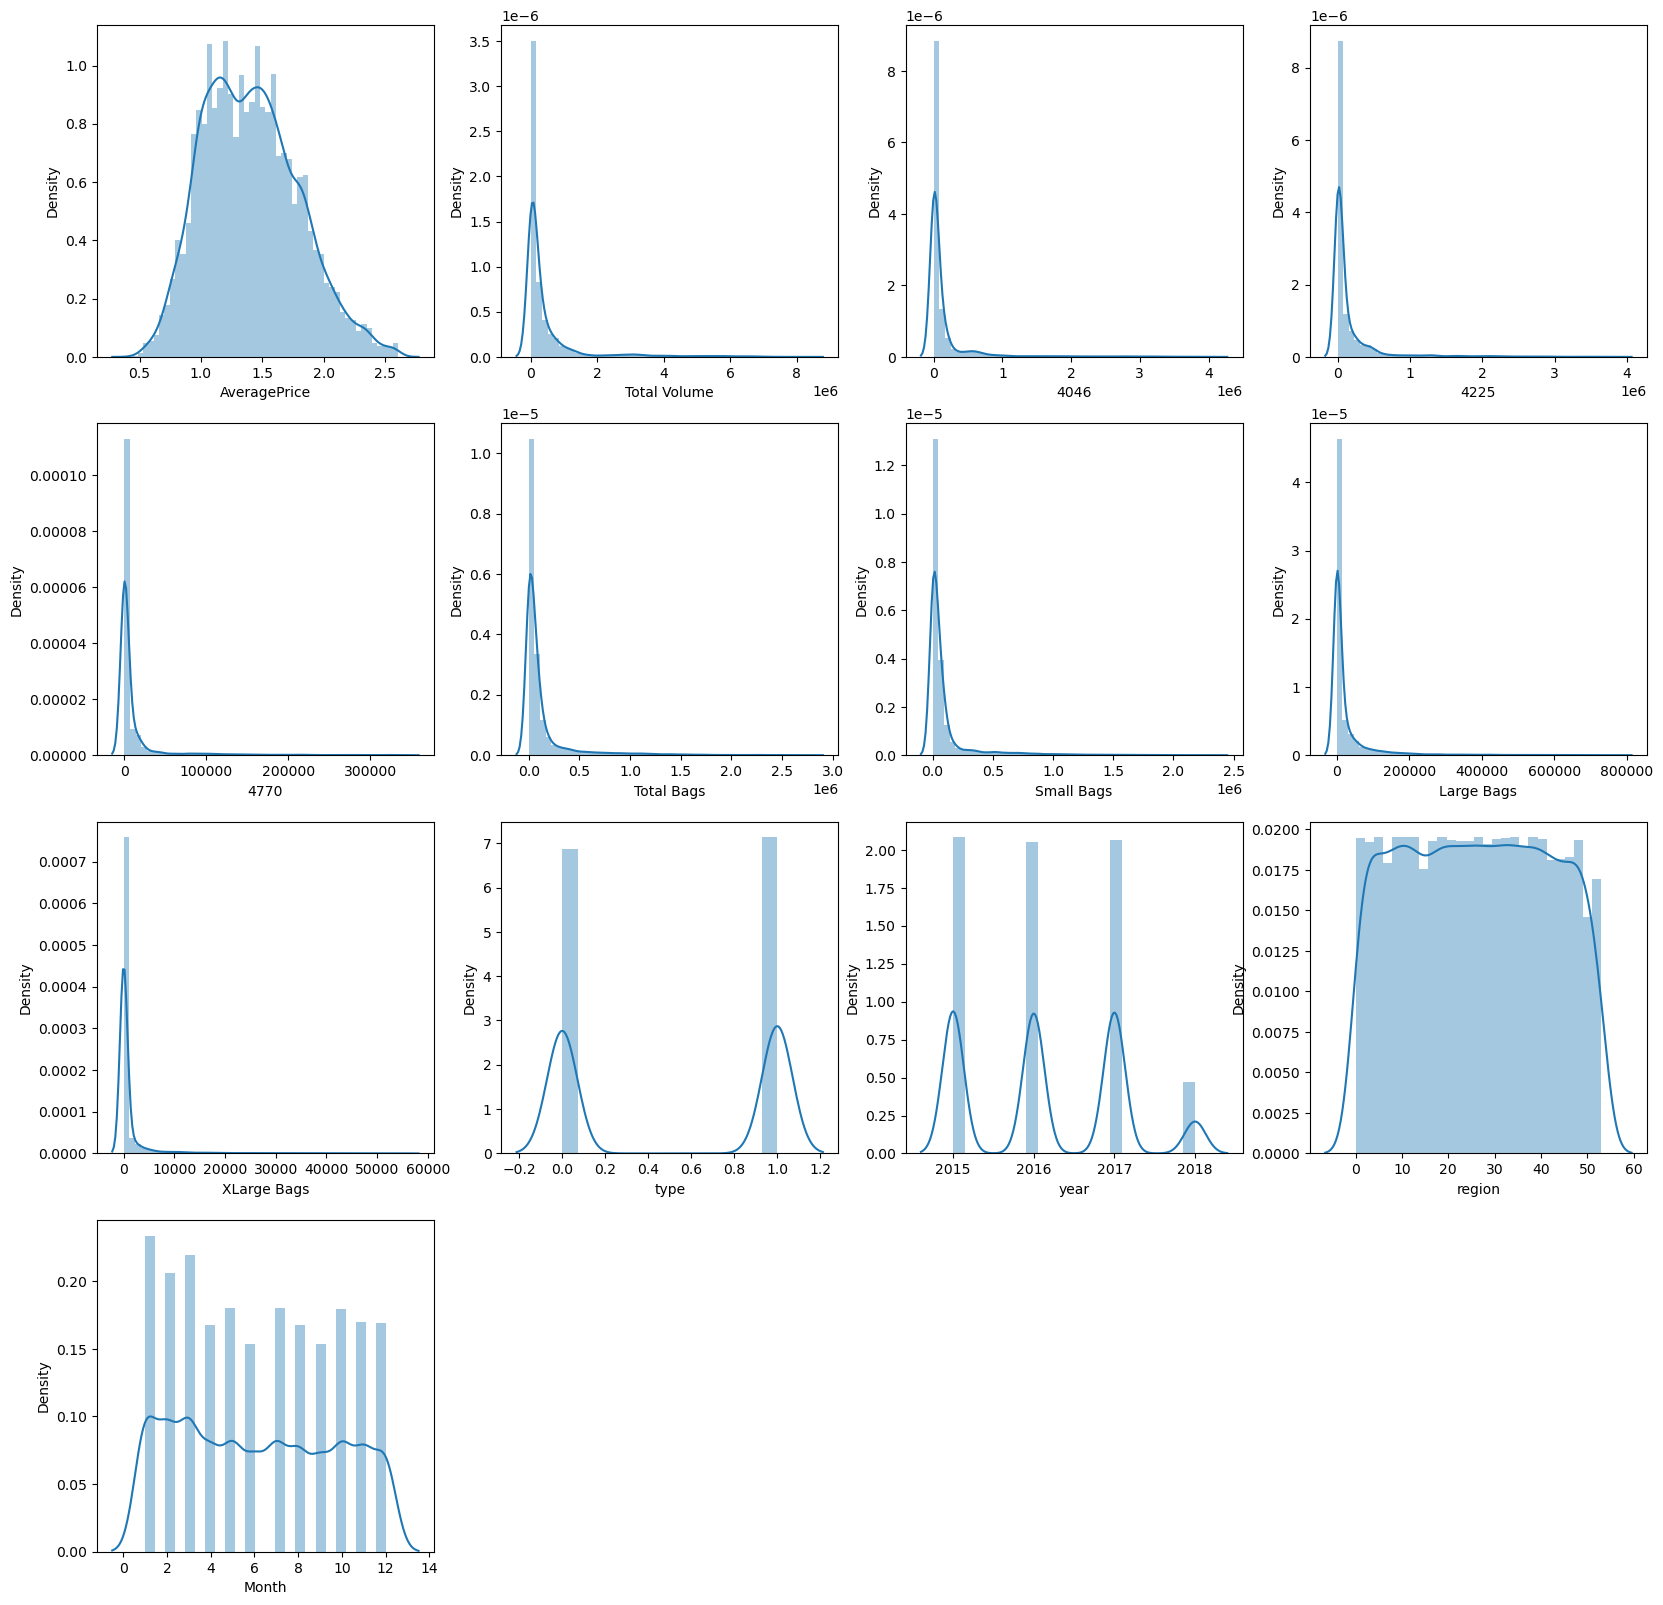

In [75]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=13:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

Below are the skewed columns

Total Volume

4046

4225

4770

Total Bags

Small Bags

Large Bags

XLarge Bags

# Removing Skewness using yeo-johnson method

In [77]:
skewed_features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')
df[skewed_features] = scale.fit_transform(df[skewed_features].values)
df[skewed_features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   -0.347421   
1     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   -0.311322   
2      0.205556 -0.731776  0.649333  0.023923   -0.566369   -0.374453   
3      0.019655 -0.632592  0.468799 -0.121164   -0.713068   -0.510991   
4     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   -0.490534   

   Large Bags  XLarge Bags  
0   -0.781153    -0.677919  
1   -0.771198    -0.677919  
2   -0.758523    -0.677919  
3   -0.699123    -0.677919  
4   -0.607027    -0.677919

In [78]:
df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1          1.35     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2          0.93      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3          1.08      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4          1.28     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  
0   -0.347421   -0.781153    -0.677919     0  2015       0     12  
1   -0.311322   -0.771198    -0.677919     0  2015       0     12  
2   -0.374453   -0.758523    -0.677919     0  2015       0     12  
3   -0.510991   -0.699123    -0.677919     0  2015       0     12  
4   -0.490534   -0.607027    -0.677919     0  2015       0     11

In [79]:
df.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

# Checking skewness after removing

<function matplotlib.pyplot.show(close=None, block=None)>

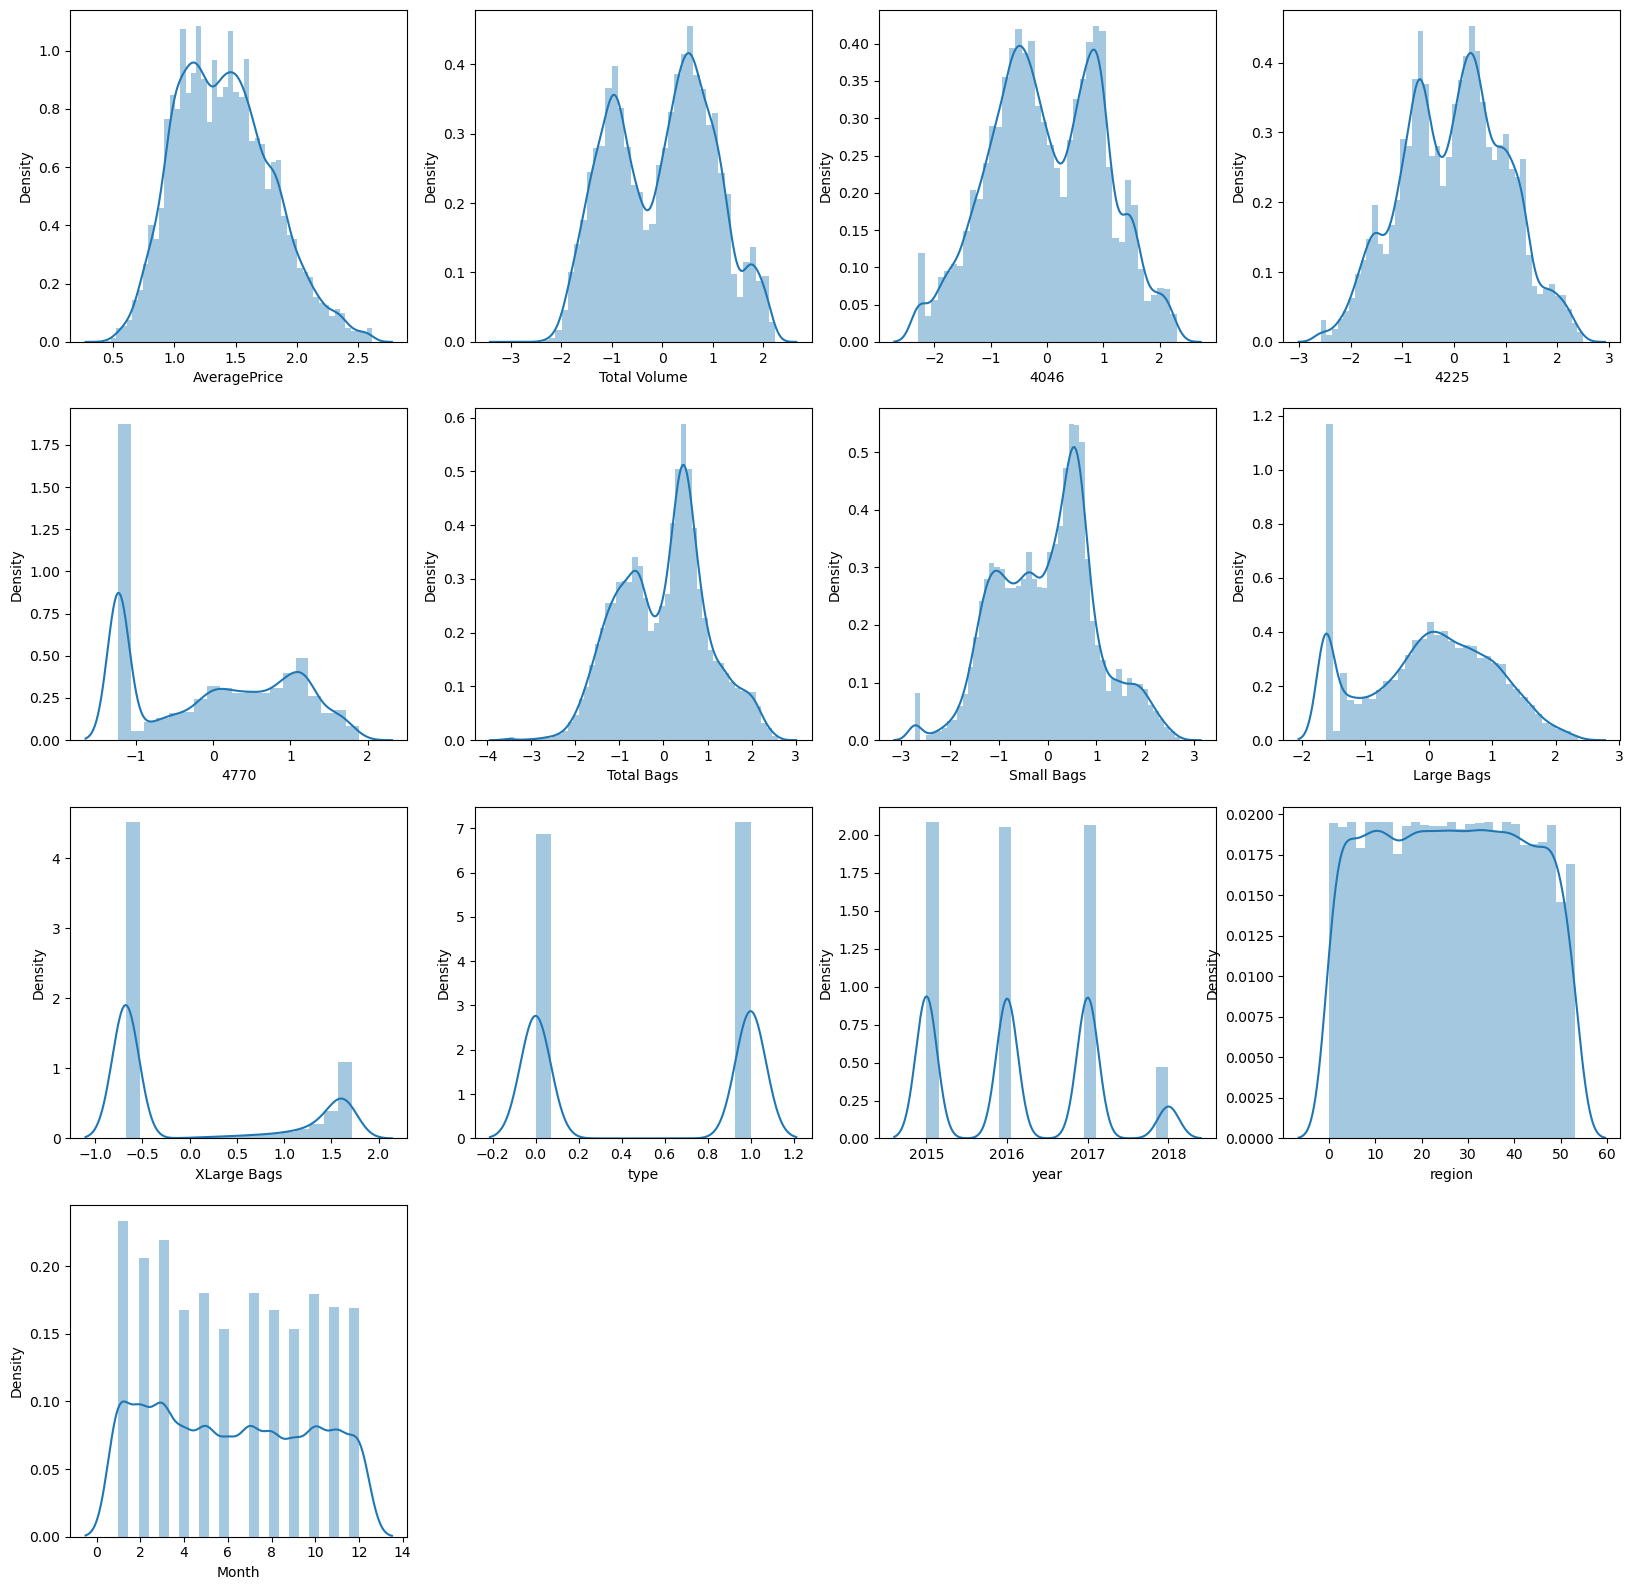

In [80]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=13:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

# Outliers and skewness are removed now and we are ready to define X and Y

In [81]:
x = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']
x.shape

(17651, 12)

In [82]:
y.shape

(17651,)

In [83]:
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.075324 -0.657421  0.351430 -0.222566   -0.537507   -0.347421   
1         -0.147497 -0.777179  0.269513 -0.175223   -0.498128   -0.311322   
2          0.205556 -0.731776  0.649333  0.023923   -0.566369   -0.374453   
3          0.019655 -0.632592  0.468799 -0.121164   -0.713068   -0.510991   
4         -0.180674 -0.684504  0.262126 -0.110491   -0.686312   -0.490534   
...             ...       ...       ...       ...         ...         ...   
18244     -0.678214 -0.462066 -0.926028 -1.228986   -0.340422   -0.175753   
18245     -0.771326 -0.618019 -0.670600 -1.228986   -0.509513   -0.331971   
18246     -0.775274 -0.617966 -0.778893  0.445710   -0.503366   -0.313756   
18247     -0.701797 -0.547011 -0.716371  0.445399   -0.434176   -0.250408   
18248     -0.667381 -0.359671 -0.791650  0.157768   -0.393236   -0.211755   

       Large Bags  XLarge Bags  type  year  region  Month  
0       -0.781153    -0.677919     0  2015       0     12  
1       -0.771198    -0.677919     0  2015       0     12  
2       -0.758523    -0.677919     0  2015       0     12  
3       -0.699123    -0.677919     0  2015       0     12  
4       -0.607027    -0.677919     0  2015       0     11  
...           ...          ...   ...   ...     ...    ...  
18244   -0.412401    -0.677919     1  2018      53      2  
18245   -0.484991    -0.677919     1  2018      53      1  
18246   -0.950743    -0.677919     1  2018      53      1  
18247   -0.916068    -0.677919     1  2018      53      1  
18248   -1.048116    -0.677919     1  2018      53      1  

[17651 rows x 12 columns]

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.075324 -0.657421  0.351430 -0.222566   -0.537507   -0.347421   
1         -0.147497 -0.777179  0.269513 -0.175223   -0.498128   -0.311322   
2          0.205556 -0.731776  0.649333  0.023923   -0.566369   -0.374453   
3          0.019655 -0.632592  0.468799 -0.121164   -0.713068   -0.510991   
4         -0.180674 -0.684504  0.262126 -0.110491   -0.686312   -0.490534   
...             ...       ...       ...       ...         ...         ...   
17646     -0.678214 -0.462066 -0.926028 -1.228986   -0.340422   -0.175753   
17647     -0.771326 -0.618019 -0.670600 -1.228986   -0.509513   -0.331971   
17648     -0.775274 -0.617966 -0.778893  0.445710   -0.503366   -0.313756   
17649     -0.701797 -0.547011 -0.716371  0.445399   -0.434176   -0.250408   
17650     -0.667381 -0.359671 -0.791650  0.157768   -0.393236   -0.211755   

       Large Bags  XLarge Bags      type      year    region     Month  
0       -0.781153    -0.677919 -1.019047 -1.210013 -1.695495  1.644612  
1       -0.771198    -0.677919 -1.019047 -1.210013 -1.695495  1.644612  
2       -0.758523    -0.677919 -1.019047 -1.210013 -1.695495  1.644612  
3       -0.699123    -0.677919 -1.019047 -1.210013 -1.695495  1.644612  
4       -0.607027    -0.677919 -1.019047 -1.210013 -1.695495  1.362113  
...           ...          ...       ...       ...       ...       ...  
17646   -0.412401    -0.677919  0.981309  1.980756  1.747054 -1.180379  
17647   -0.484991    -0.677919  0.981309  1.980756  1.747054 -1.462878  
17648   -0.950743    -0.677919  0.981309  1.980756  1.747054 -1.462878  
17649   -0.916068    -0.677919  0.981309  1.980756  1.747054 -1.462878  
17650   -1.048116    -0.677919  0.981309  1.980756  1.747054 -1.462878  

[17651 rows x 12 columns]

# We will check and handle multicolinarity using VIF

In [85]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month'],
      dtype='object')

In [86]:
Columnsname=['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month']

In [87]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=Columnsname
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

Features List  VIF Value
0   Total Volume  53.871113
1           4046   7.258540
2           4225  11.390177
3           4770   3.952991
4     Total Bags  35.135075
5     Small Bags  16.627143
6     Large Bags   3.460369
7    XLarge Bags   2.055112
8           type   3.700346
9           year   1.394867
10        region   1.086993
11         Month   1.055994

In [88]:
# Dropping Total Volumen as it has high VIF value

x.drop('Total Volume',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF values
0          4046    3.750206
1          4225    4.327018
2          4770    3.939381
3    Total Bags   24.579425
4    Small Bags   16.626159
5    Large Bags    3.416372
6   XLarge Bags    2.041018
7          type    3.481838
8          year    1.392280
9        region    1.079241
10        Month    1.053772

In [89]:
# Droping Total Bags

x.drop('Total Bags',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF values
0         4046    3.729269
1         4225    4.170725
2         4770    3.939063
3   Small Bags    4.132185
4   Large Bags    1.871934
5  XLarge Bags    2.040410
6         type    3.478008
7         year    1.365919
8       region    1.079214
9        Month    1.052908

In [90]:
# Droping Total Small Bags

x.drop('Small Bags',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF values
0         4046    3.249879
1         4225    3.783140
2         4770    3.754937
3   Large Bags    1.867487
4  XLarge Bags    2.037259
5         type    3.453692
6         year    1.181582
7       region    1.078699
8        Month    1.043598

Now we can not keep droping columns otherwise we would have not much data for predication.

In [91]:
print(x.shape)
print(y.shape)

(17651, 9)
(17651,)


# Finding best random stage

In [92]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [93]:
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8838916942858976 on Random State: 29


We found best random state 29 which has highest accuracy 88 %

In [94]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
adb=AdaBoostRegressor()
gdb=GradientBoostingRegressor()
lnr=LinearRegression()
rfr=RandomForestRegressor()
sv=SVR()
lss=Lasso(alpha=10)

model=[dt,kn,adb,gdb,lnr,rfr,sv,lss]

for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=29)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("RMSE Score is:",mean_squared_error(y_test,predi))
    print('MAE:',mean_absolute_error(y_test, predi))
    print('MSE:',mean_squared_error(y_test, predi))
    r2 = r2_score(y_test, predi)*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(i, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    print("*****************************************************************")

performance matrix of DecisionTreeRegressor() is:
RMSE Score is: 0.03806992353440951
MAE: 0.1279609175870858
MSE: 0.03806992353440951
R2 Score is: 75.06364218835144
Cross Validation Score: -23.741428567920604
R2 Score - Cross Validation Score is 98.80507075627204
*****************************************************************
performance matrix of KNeighborsRegressor() is:
RMSE Score is: 0.021404512036250354
MAE: 0.10295950155763241
MSE: 0.021404512036250354
R2 Score is: 85.97973094331944
Cross Validation Score: 1.317080726600517
R2 Score - Cross Validation Score is 84.66265021671892
*****************************************************************
performance matrix of AdaBoostRegressor() is:
RMSE Score is: 0.06770448209537462
MAE: 0.21112570083798501
MSE: 0.06770448209537462
R2 Score is: 55.6525720505679
Cross Validation Score: 4.426925848592404
R2 Score - Cross Validation Score is 51.22564620197549
*****************************************************************
performance matri

I can see that Gradiant Boosting is working good with 77 % of R2 score and least difference between Cross validation and R2 score

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameters grids
params_sgbt = {
    'max_depth': [1],
    'subsample': [0.2, 0.5, 0.8],
    'max_features': [0.2, 0.5, 0.8],
    'n_estimators': [100, 300, 500]
}
params = {
    "boxcox_transformer": "false",
    "minmax_scaller": "true",
    "hyperparameter_tuning": "true"}

In [ ]:
learning_rate = [0.03, 0.04, 0.05, 0.06]
n_estimators = [140, 150, 160]
subsample = [0.7, 0.75, 0.8, 0.85]
min_samples_leaf = [10, 12, 15]
max_depth = [4, 5, 6] 
max_features = ['auto', 'sqrt']
warm_start = [True]

# Create the grid
random_grid = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'subsample': subsample,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'max_depth': max_depth,
               'max_features': max_features,
               'warm_start': warm_start}
gbr = GradientBoostingRegressor(random_state=123)
gbr_tuning = GridSearchCV(estimator=gbr, param_grid=random_grid, cv=3, verbose=10, n_jobs=-1)
gbr_tuning.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


In [ ]:
gbr_tuning.best_params_

In [ ]:
Avacado_model=GradientBoostingRegressor(learning_rate=0.06,max_depth=6,max_features='auto',min_samples_leaf=10,n_estimators=160,subsample=0.8,warm_start='True')

Avacado_model.fit(x_train,y_train)
pred = Avacado_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# We Got improvement almost 7 % after hypertunning parameters for Gradiant Boosting regression
Saving best Model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(Avacado_model,"Avocado_price.pkl")

In [ ]:
#Lets use saved model

model=joblib.load("Avocado_price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=prediction,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('GradientBoostingRegressor ',fontsize=18)
plt.show()


# We can see that our Actul and predicated values are plotted very closely which means model is worikng good and there is no indicator of overfitting

# Now we will create classification model for region prediction

In [14]:
#Importing dataset

df2=pd.read_csv("avocado.csv.zip")
df2

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [15]:
# We dont required "Unnamed:" Coloumn as we already have deafult index

df2.drop(['Unnamed: 0'],axis=1,inplace=True)
# Lets treat date first and change date as date type

df2['Date']=pd.to_datetime(df2['Date'])
# now we will extract date and month from data as we already have year's seprate column in data set

df2["Month"] = df2["Date"].dt.month
df2["Day"] = df2["Date"].dt.day
df2.drop("Date",axis=1,inplace=True)
df2.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [16]:
# Handling Objest using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list=['type','region',]

for i in list:
    df2[i]=le.fit_transform(df2[i].astype(str))
df2

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[18249 rows x 14 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


In [18]:
df2['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [19]:
df2["region"].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

So we can see all regions are equally distributted and same counts available

In [20]:
df2.shape

(18249, 14)

In [21]:
df2.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

<AxesSubplot:xlabel='region', ylabel='count'>

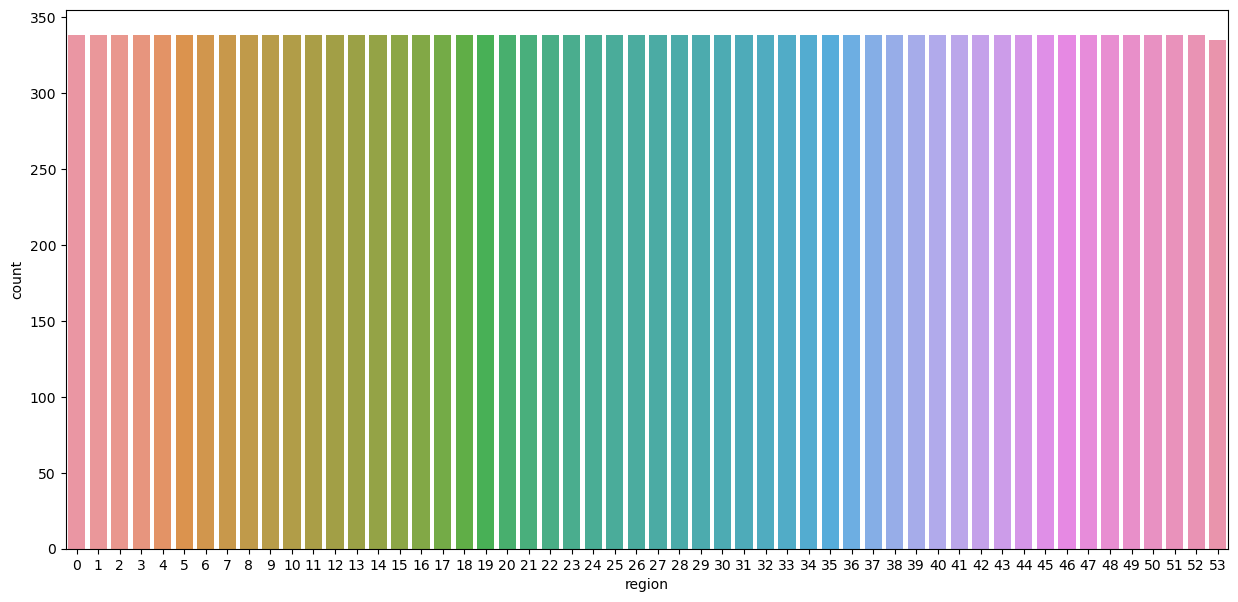

In [22]:
countplt, ax = plt.subplots(figsize = (15,7))

sns.countplot(x='region',data=df)

So we can see that from above plot, we have equal data for avery region. So we dont need to even perform undersampling or oversampling

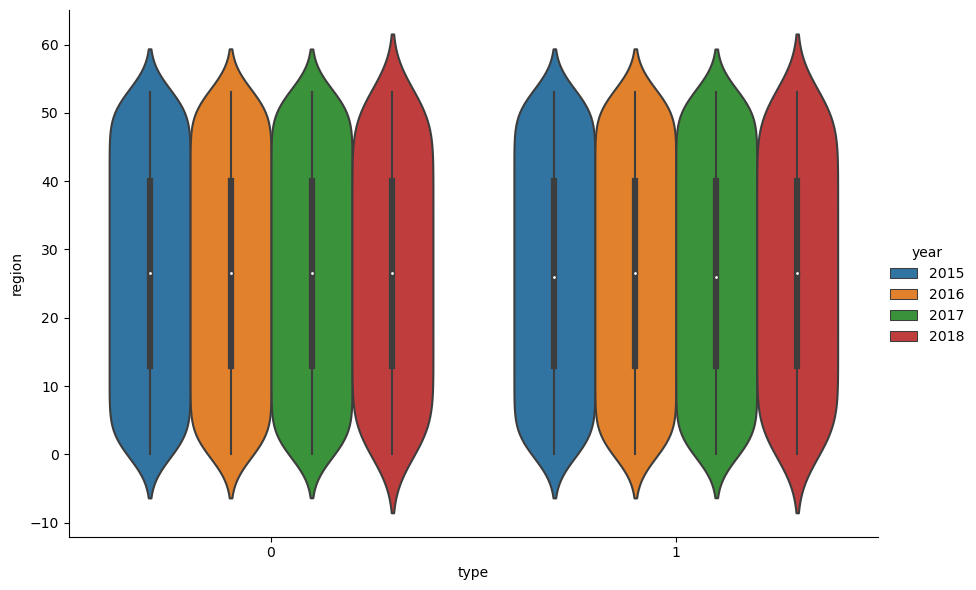

In [23]:
sns.catplot(x='type',
            y='region',
            hue='year',
            data=df2,
            height=6,aspect=1.5,
            kind='violin')

Again we can see that all region are equally divided in avery year.

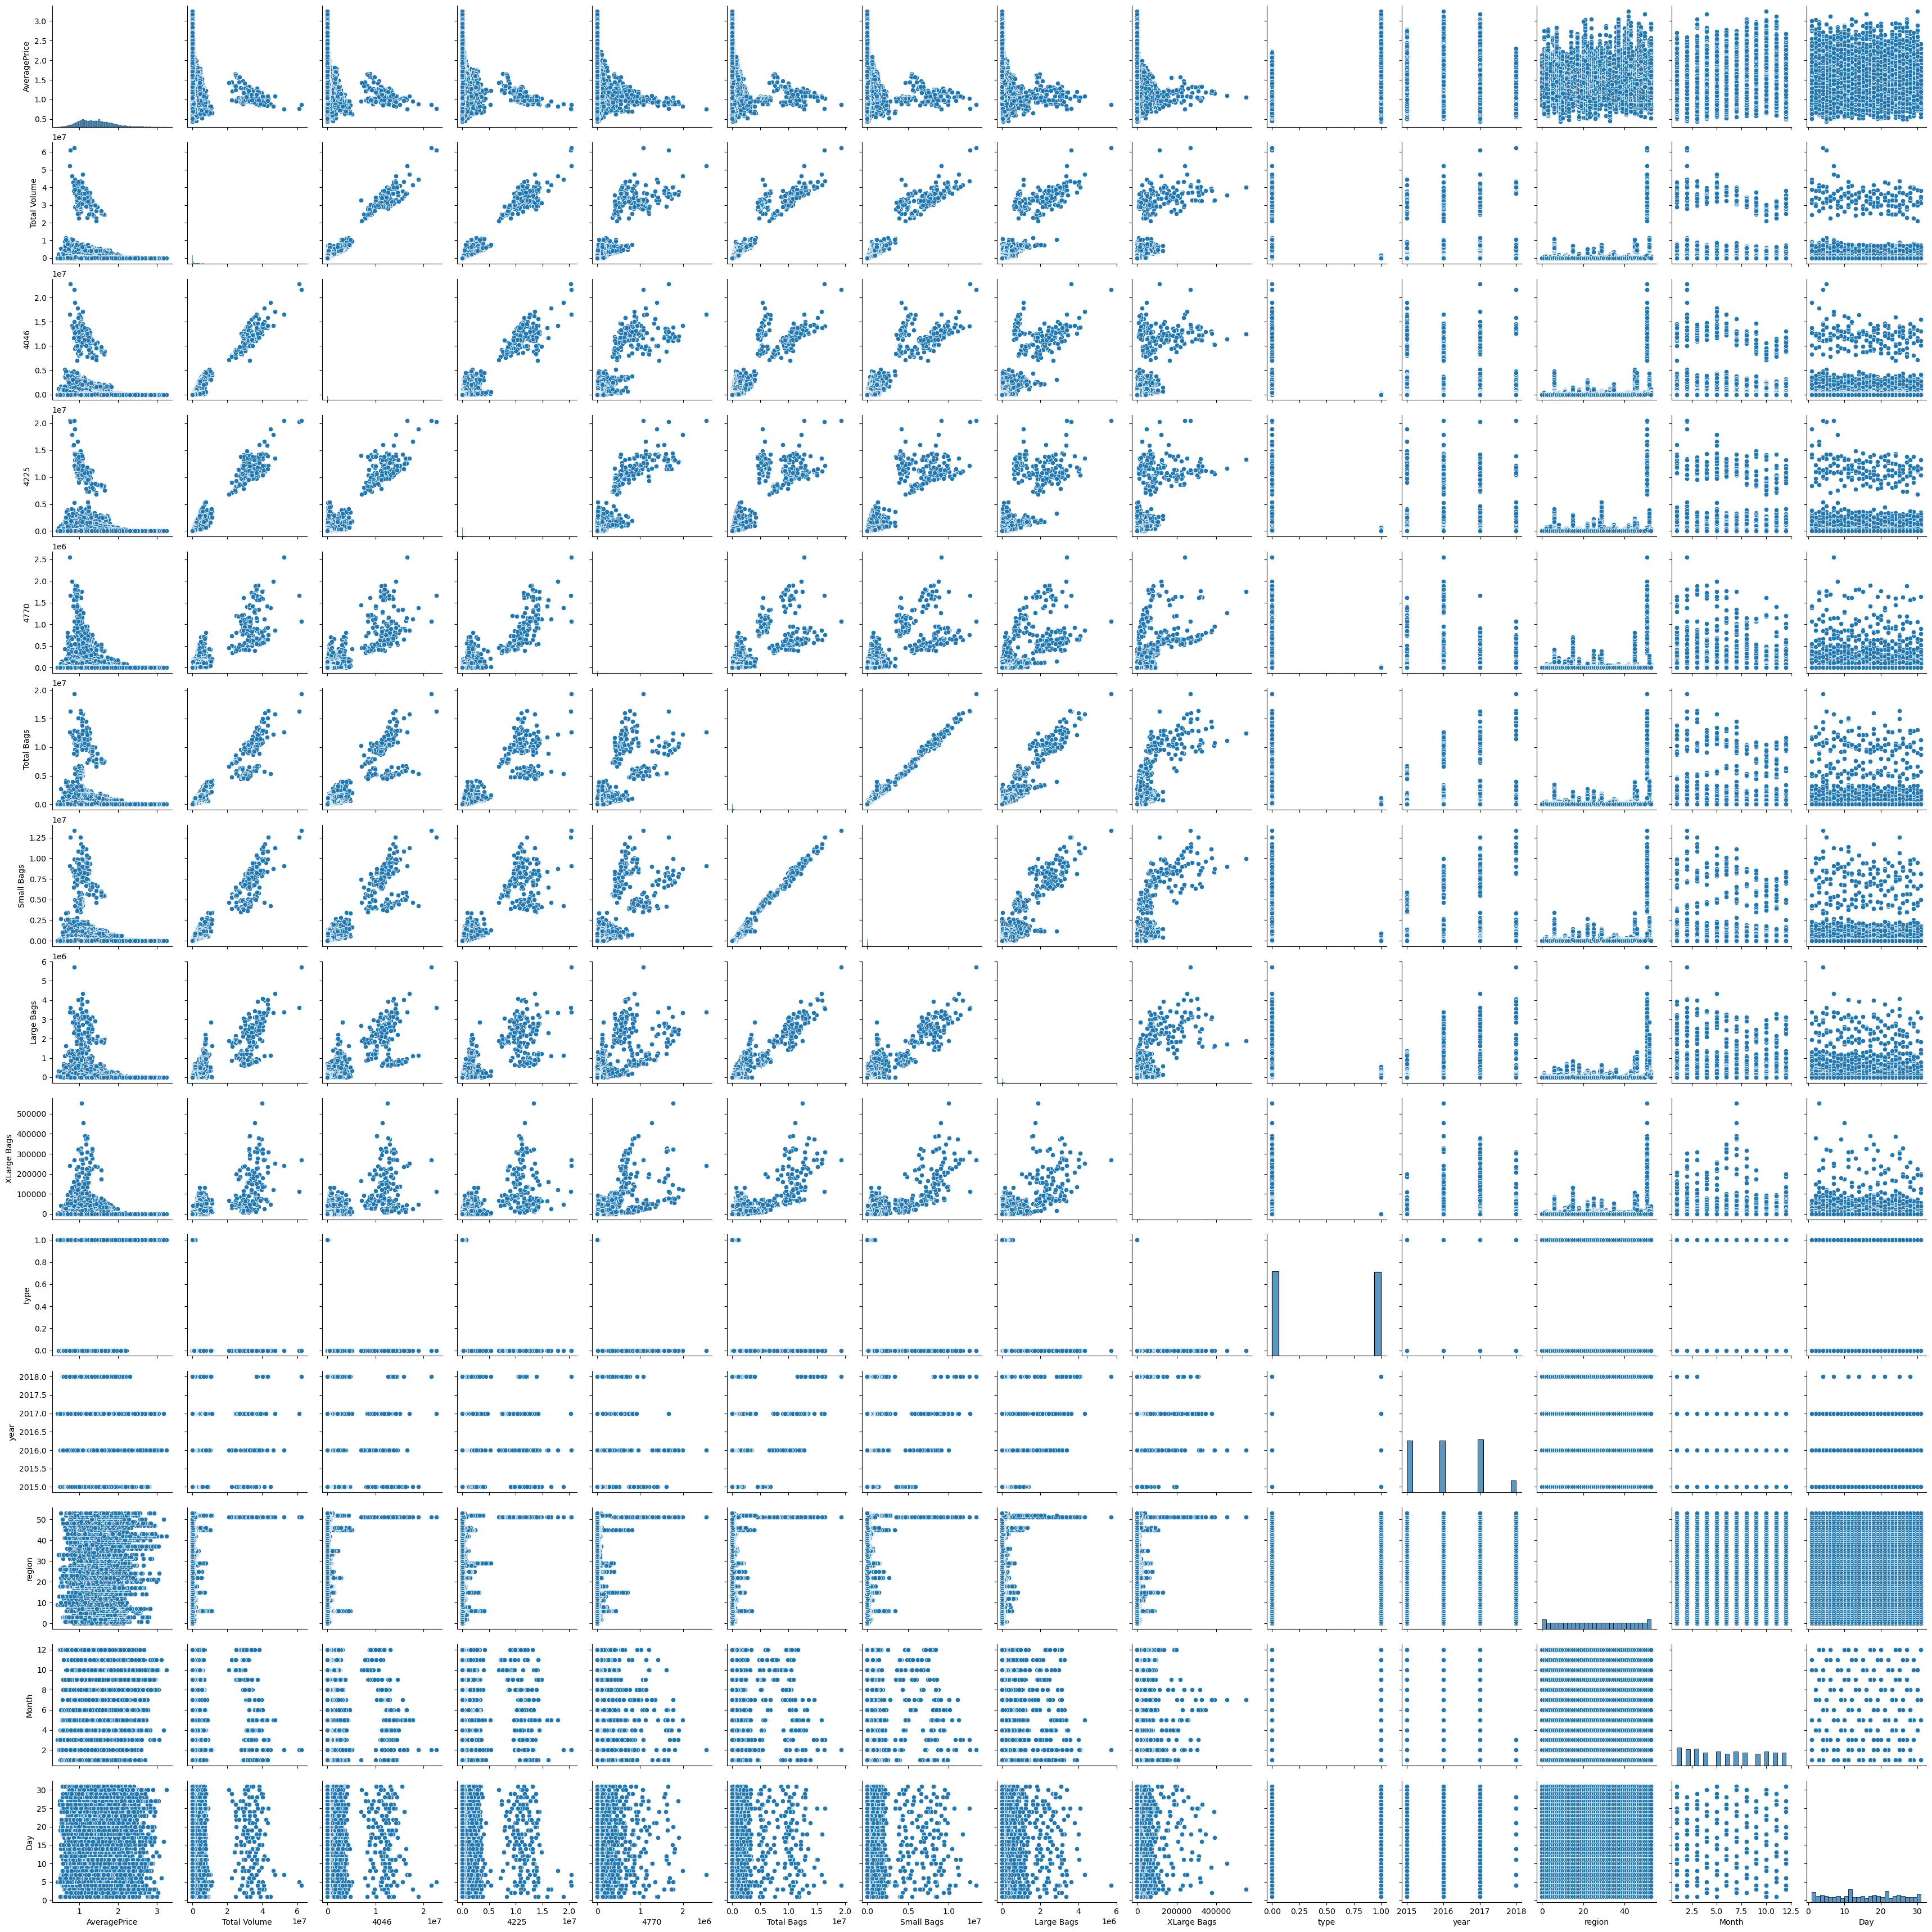

In [24]:
sns.pairplot(df2)

<AxesSubplot:xlabel='region', ylabel='year'>

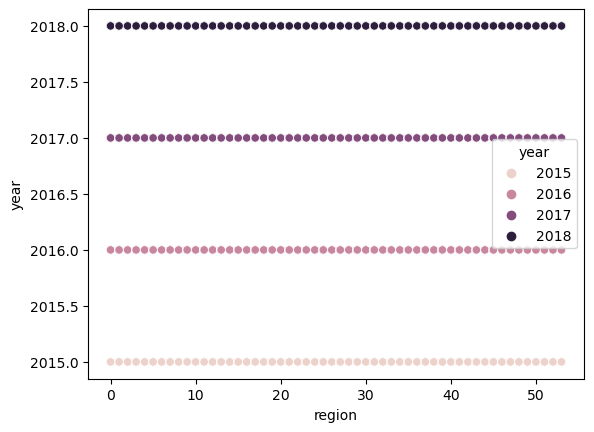

In [25]:
sns.scatterplot
sns.scatterplot(x="region",y="year",data=df,hue='year')

<AxesSubplot:>

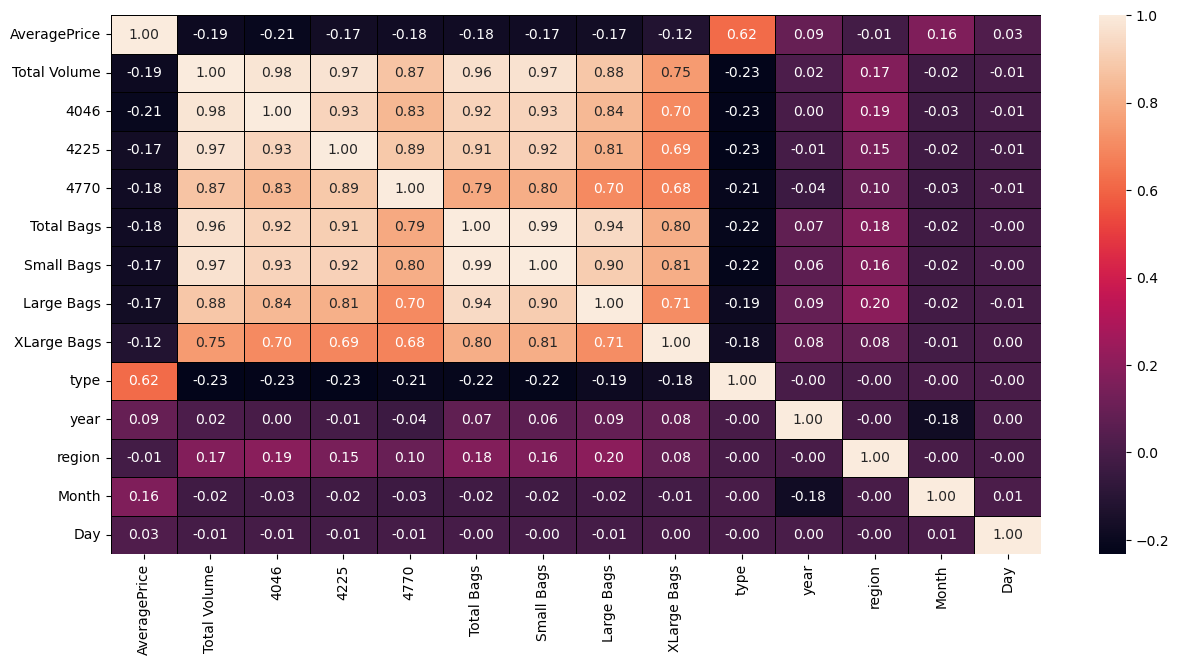

In [26]:
# we will plot all aboev values on hitmap just for good visualisation

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

In [27]:
df2.corr()['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
Day            -0.000021
year           -0.000055
Month          -0.000144
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

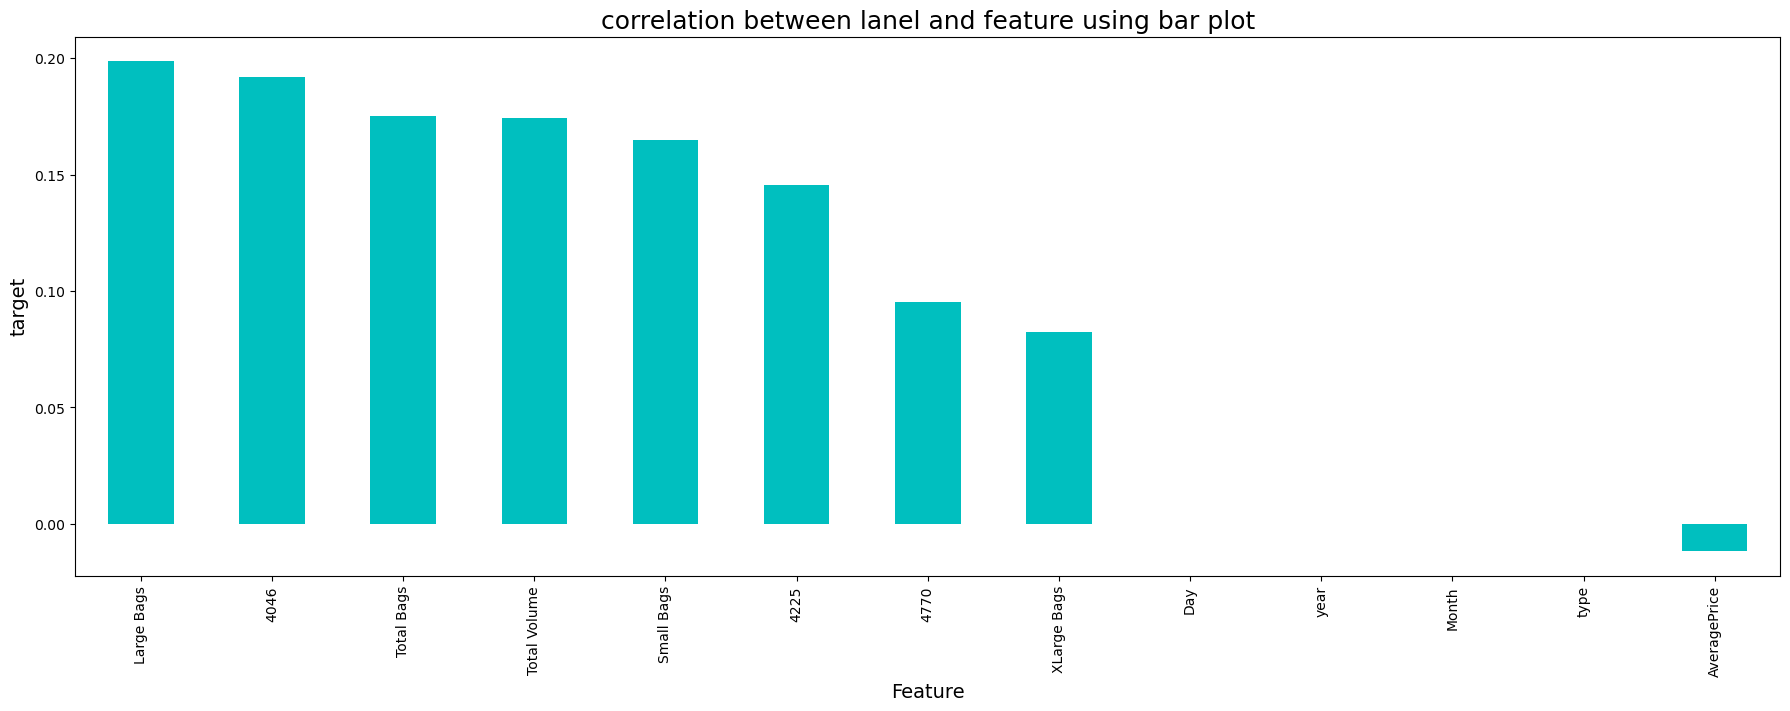

In [28]:
plt.figure(figsize=(22,7))
df2.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

Day,Year,month,type has no relation with region so we can drop them

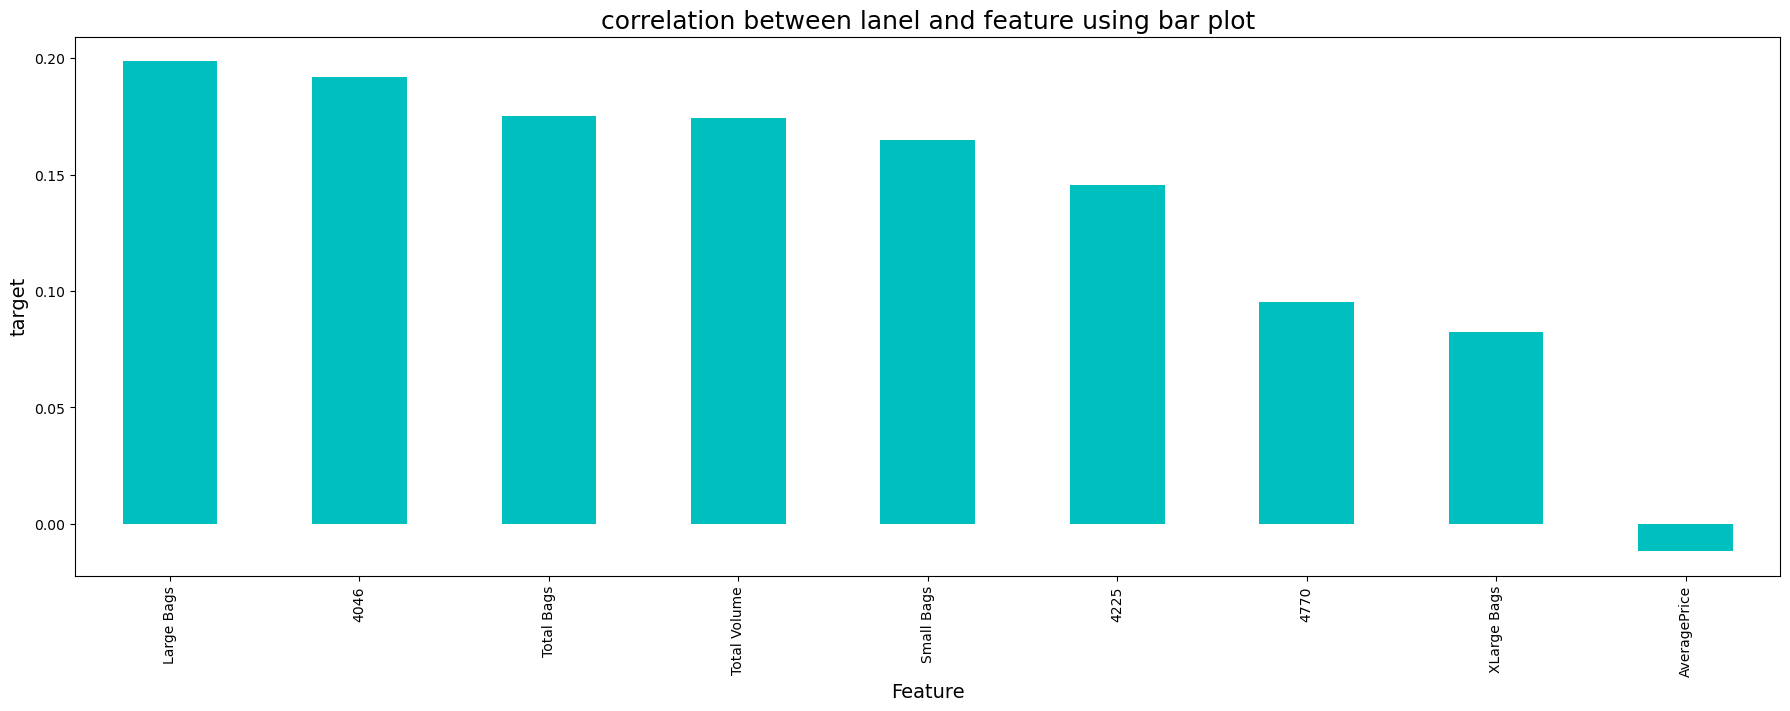

In [29]:
# Dropping irrelivant columns

df2.drop("year",axis=1, inplace=True)
df2.drop("Day",axis=1, inplace=True)
df2.drop("Month",axis=1, inplace=True)
df2.drop("type",axis=1, inplace=True)
plt.figure(figsize=(22,7))
df2.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

# Outliers Checking in Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

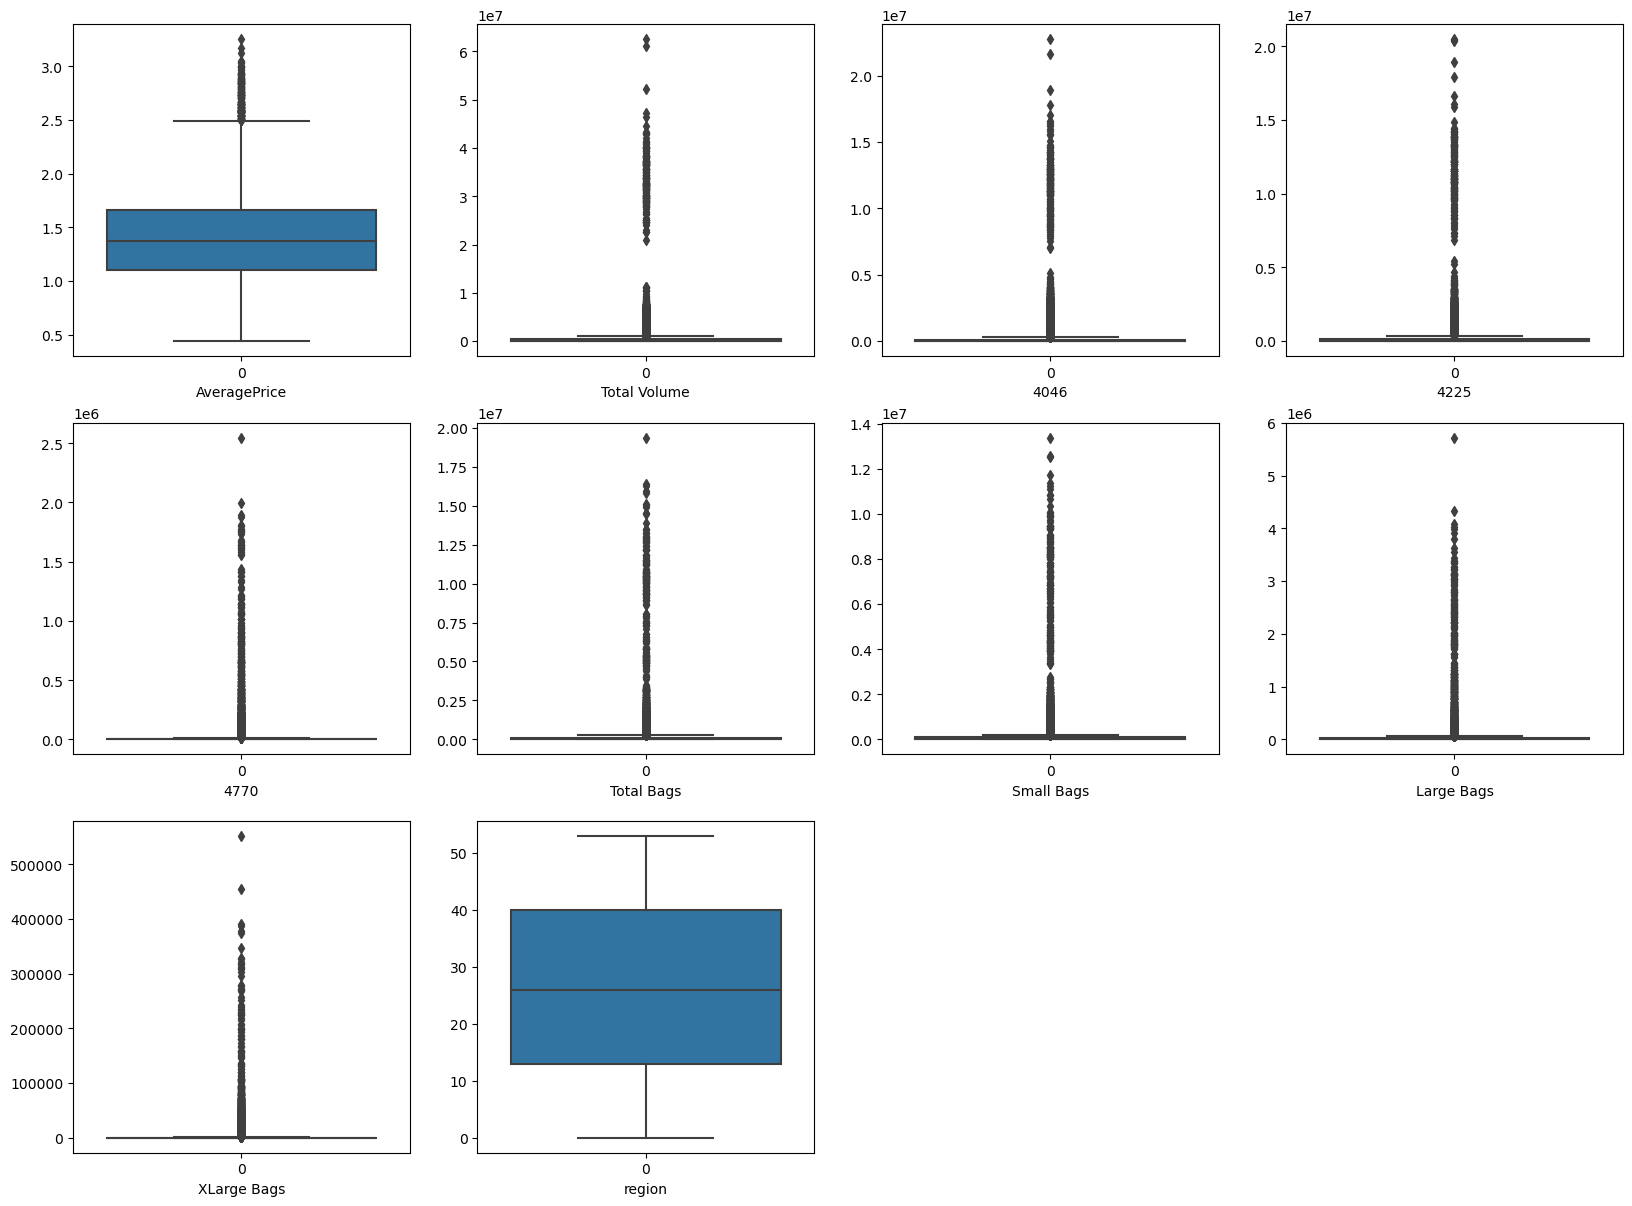

In [30]:
plt.figure(figsize=(20,25))

graph=1

for i in df2:
    if graph<=13:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df2[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

We need to handle outliers

In [31]:
# Lets Treat outliers

from scipy.stats import zscore
zscore=zscore(df2)
zabs=np.abs(zscore)

z=df2[(zabs<3).all(axis=1)]


z.shape

(17651, 10)

In [32]:
df2.shape

(18249, 10)

In [33]:
loss=(18249-17651)/18249*100
loss

3.276891884486821

In [34]:
dropindex=df2.index.difference(z.index)
dropindex

Int64Index([  346,   359,   780,   781,   783,   787,   788,   790,   791,
              792,
            ...
            17250, 17251, 17255, 17300, 17301, 17302, 17303, 17304, 17402,
            17428],
           dtype='int64', length=598)

In [35]:
df2.drop(dropindex,inplace=True)
df2

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  region  
0         8603.62       93.25          0.0       0  
1         9408.07       97.49          0.0       0  
2         8042.21      103.14          0.0       0  
3         5677.40      133.76          0.0       0  
4         5986.26      197.69          0.0       0  
...           ...         ...          ...     ...  
18244    13066.82      431.85          0.0      53  
18245     8940.04      324.80          0.0      53  
18246     9351.80       42.31          0.0      53  
18247    10919.54       50.00          0.0      53  
18248    11988.14       26.01          0.0      53  

[17651 rows x 10 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

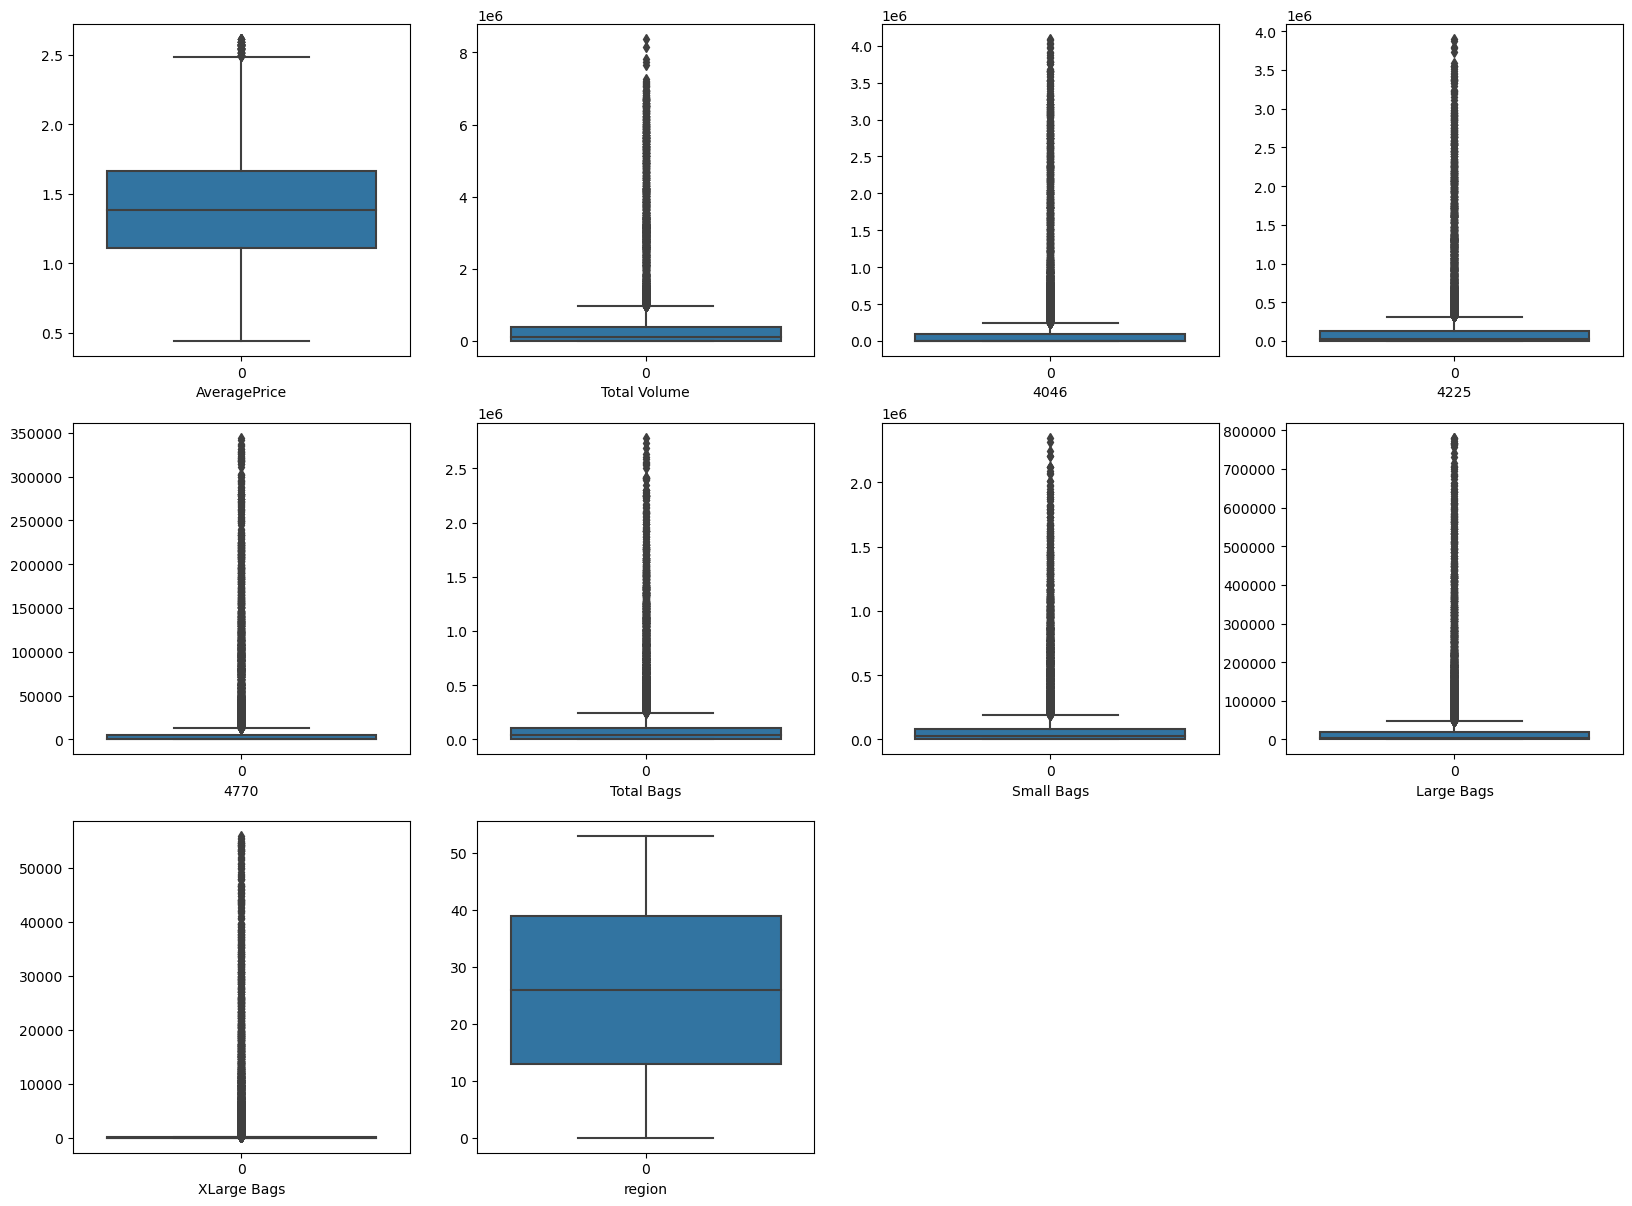

In [36]:
plt.figure(figsize=(20,25))

graph=1

for i in df2:
    if graph<=13:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df2[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

In [37]:
df2.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
region          0.012798
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

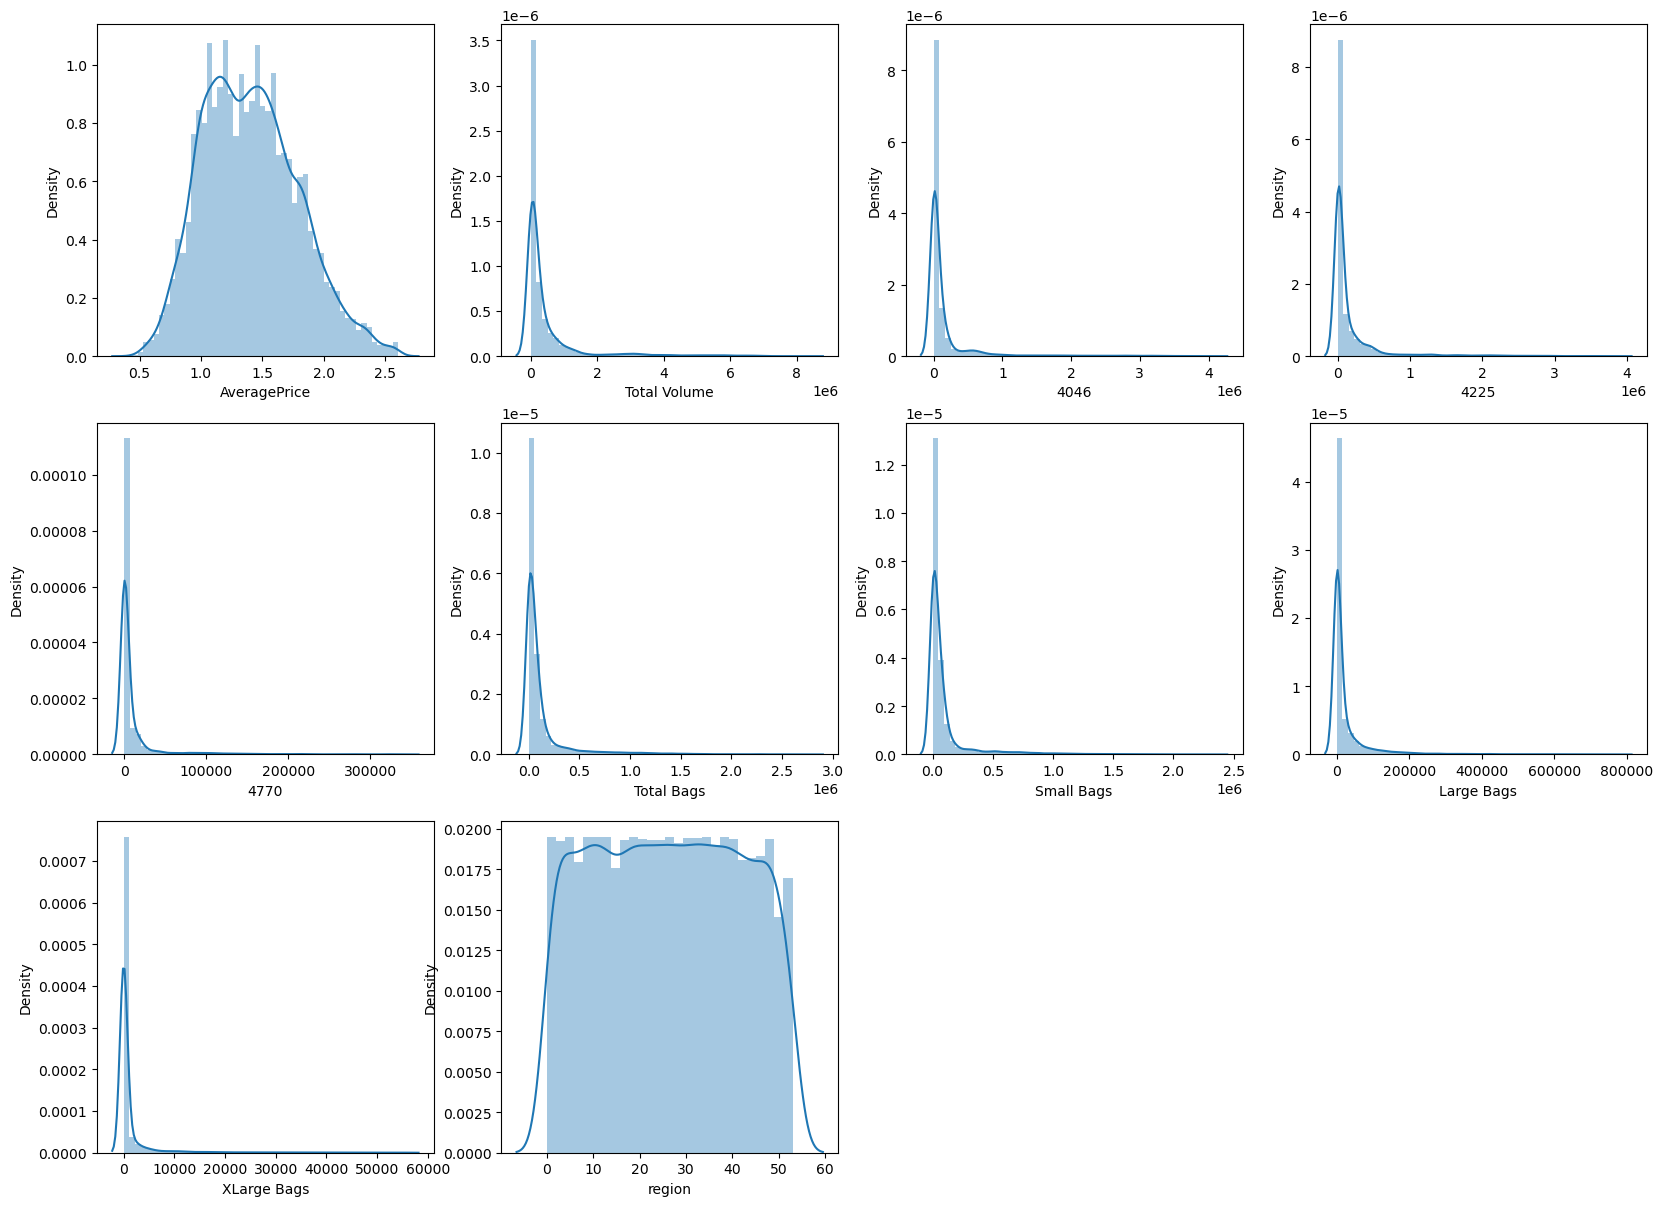

In [38]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df2:
    if plot<=13:
        plt.subplot(5,4,plot)
        sns.distplot(df2[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

In [39]:
skewed_features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')
df2[skewed_features] = scale.fit_transform(df2[skewed_features].values)
df2[skewed_features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   -0.347421   
1     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   -0.311322   
2      0.205556 -0.731776  0.649333  0.023923   -0.566369   -0.374453   
3      0.019655 -0.632592  0.468799 -0.121164   -0.713068   -0.510991   
4     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   -0.490534   

   Large Bags  XLarge Bags  
0   -0.781153    -0.677919  
1   -0.771198    -0.677919  
2   -0.758523    -0.677919  
3   -0.699123    -0.677919  
4   -0.607027    -0.677919

In [40]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

# Checking Skewness after removing

<function matplotlib.pyplot.show(close=None, block=None)>

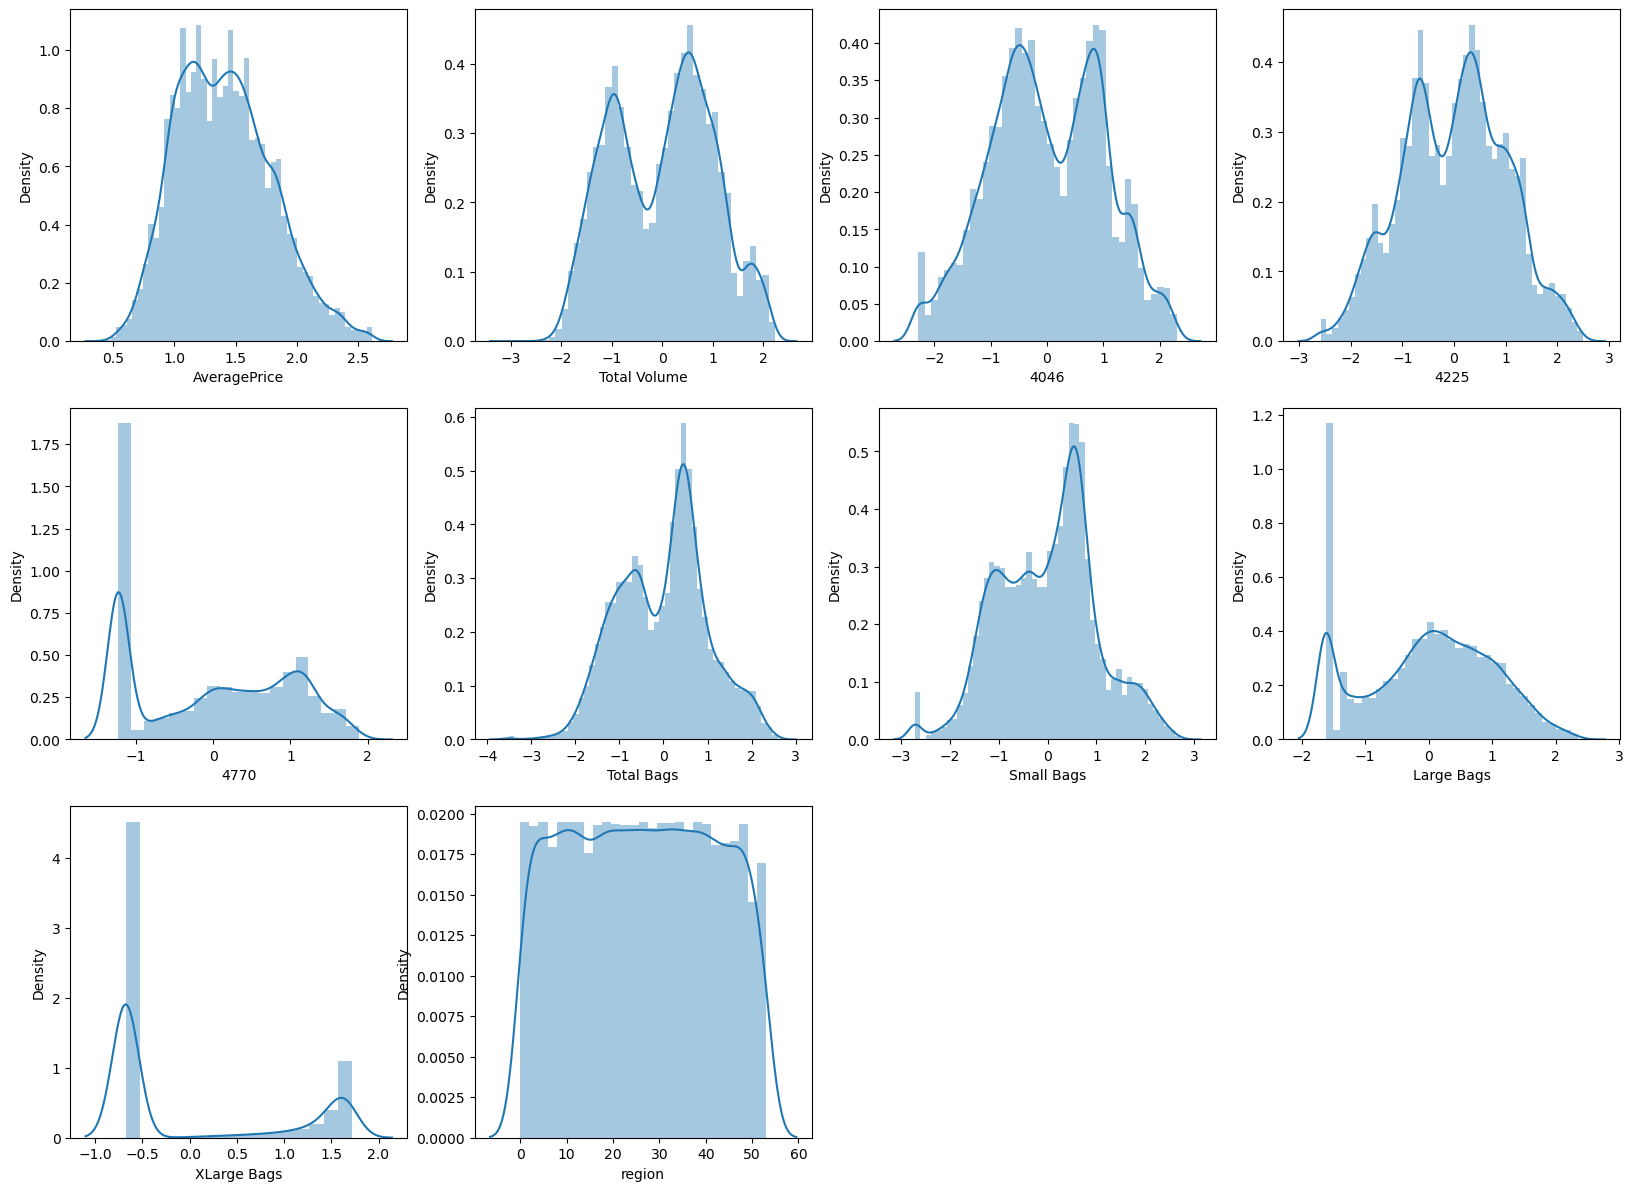

In [41]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df2:
    if plot<=13:
        plt.subplot(5,4,plot)
        sns.distplot(df2[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

# Outliers and skewness are removed now and we are ready to define X and Y

In [45]:
x = df2.drop('region', axis=1)
y = df2['region']
x.shape

(17651, 9)

In [46]:
y.shape

(17651,)

In [47]:
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1              1.35     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2              0.93      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3              1.08      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4              1.28     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.678214 -0.462066 -0.926028 -1.228986   -0.340422   
18245          1.71     -0.771326 -0.618019 -0.670600 -1.228986   -0.509513   
18246          1.87     -0.775274 -0.617966 -0.778893  0.445710   -0.503366   
18247          1.93     -0.701797 -0.547011 -0.716371  0.445399   -0.434176   
18248          1.62     -0.667381 -0.359671 -0.791650  0.157768   -0.393236   

       Small Bags  Large Bags  XLarge Bags  
0       -0.347421   -0.781153    -0.677919  
1       -0.311322   -0.771198    -0.677919  
2       -0.374453   -0.758523    -0.677919  
3       -0.510991   -0.699123    -0.677919  
4       -0.490534   -0.607027    -0.677919  
...           ...         ...          ...  
18244   -0.175753   -0.412401    -0.677919  
18245   -0.331971   -0.484991    -0.677919  
18246   -0.313756   -0.950743    -0.677919  
18247   -0.250408   -0.916068    -0.677919  
18248   -0.211755   -1.048116    -0.677919  

[17651 rows x 9 columns]

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.195352     -0.075324 -0.657421  0.351430 -0.222566   -0.537507   
1         -0.143510     -0.147497 -0.777179  0.269513 -0.175223   -0.498128   
2         -1.232207      0.205556 -0.731776  0.649333  0.023923   -0.566369   
3         -0.843387      0.019655 -0.632592  0.468799 -0.121164   -0.713068   
4         -0.324959     -0.180674 -0.684504  0.262126 -0.110491   -0.686312   
...             ...           ...       ...       ...       ...         ...   
17646      0.582289     -0.678214 -0.462066 -0.926028 -1.228986   -0.340422   
17647      0.789660     -0.771326 -0.618019 -0.670600 -1.228986   -0.509513   
17648      1.204402     -0.775274 -0.617966 -0.778893  0.445710   -0.503366   
17649      1.359930     -0.701797 -0.547011 -0.716371  0.445399   -0.434176   
17650      0.556367     -0.667381 -0.359671 -0.791650  0.157768   -0.393236   

       Small Bags  Large Bags  XLarge Bags  
0       -0.347421   -0.781153    -0.677919  
1       -0.311322   -0.771198    -0.677919  
2       -0.374453   -0.758523    -0.677919  
3       -0.510991   -0.699123    -0.677919  
4       -0.490534   -0.607027    -0.677919  
...           ...         ...          ...  
17646   -0.175753   -0.412401    -0.677919  
17647   -0.331971   -0.484991    -0.677919  
17648   -0.313756   -0.950743    -0.677919  
17649   -0.250408   -0.916068    -0.677919  
17650   -0.211755   -1.048116    -0.677919  

[17651 rows x 9 columns]

# We will check and handle multicolinarity using VIF

In [49]:
df2.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'region'],
      dtype='object')

In [50]:
Columnsname=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags',]

In [51]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=Columnsname
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

Features List  VIF Value
0  AveragePrice   1.755254
1  Total Volume  53.138037
2          4046   6.806850
3          4225  12.148592
4          4770   3.451841
5    Total Bags  34.029846
6    Small Bags  17.165666
7    Large Bags   3.433969
8   XLarge Bags   1.779159

In [52]:
# Dropping Total Volume as it has high VIF value

x.drop('Total Volume',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF values
0  AveragePrice    1.646791
1          4046    3.470202
2          4225    4.157748
3          4770    3.451840
4    Total Bags   25.450781
5    Small Bags   17.136829
6    Large Bags    3.371830
7   XLarge Bags    1.778352

In [53]:
x.drop('Total Bags',axis=1,inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF values
0  AveragePrice    1.559259
1          4046    3.470083
2          4225    3.986303
3          4770    3.439785
4    Small Bags    3.561324
5    Large Bags    1.826748
6   XLarge Bags    1.778197

In [54]:
print(x.shape)
print(y.shape)

(17651, 7)
(17651,)


# Now we can find best random state

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.9027567975830816 on Random State: 50


Random state 50 is having highest accuracy score 90 %

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()


model=[LOGR,RFC,DTC,SV,KNN]


for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=50)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[15  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  1  1]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  4  1]
 [ 0  0  0 ...  0 36  0]
 [ 0  7  0 ...  0  2  2]]
Classification report :               precision    recall  f1-score   support

           0       0.20      0.15      0.17       103
           1       0.13      0.25      0.17       102
           2       0.33      0.33      0.33        93
           3       0.13      0.16      0.14        95
           4       0.37      0.32      0.35       106
           5       0.08      0.08      0.08        90
           6       0.61      0.76      0.68        92
           7       0.30      0.48      0.37       102
           8       0.41      0.60      0.48       105
           9       0.34      0.51      0.41        96
          10       0.22      0.06      0.09       103
          11       0.26      0.22      0.24       115
          12       0.22      0.38

In [57]:
from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=5)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LogisticRegression(solver='liblinear') is
[0.17757009 0.18101983 0.23541076 0.22209632 0.19008499]
0.2012363982949882
0.023221460625953257


Cross_Validation_score of RandomForestClassifier() is
[0.64372699 0.80623229 0.75637394 0.67025496 0.48470255]
0.6722581457796305
0.11047142645201521


Cross_Validation_score of DecisionTreeClassifier() is
[0.46559048 0.64759207 0.61699717 0.54390935 0.39915014]
0.5346478418989076
0.09246851409379486


Cross_Validation_score of SVC() is
[0.58821863 0.69376771 0.6592068  0.59405099 0.42152975]
0.5913547751481616
0.09375494782705068


Cross_Validation_score of KNeighborsClassifier() is
[0.59784764 0.68243626 0.67308782 0.56288952 0.41558074]
0.5863683939016866
0.09654092203275565




# I Observed that RandomForestClassifier is working best so we can Hypertune it

In [58]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'sqrt', 'n_estimators': 150}


In [59]:
region_model = RandomForestClassifier(max_features='auto',n_estimators=150 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.14350453172206


# We achived 90 % accuracy after tunning parameter

In [60]:
# Saving the model using .pkl
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

# Lets use model to predict again

In [61]:
# Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([21, 37, 16, ..., 33, 49, 18])

# ROC Curve

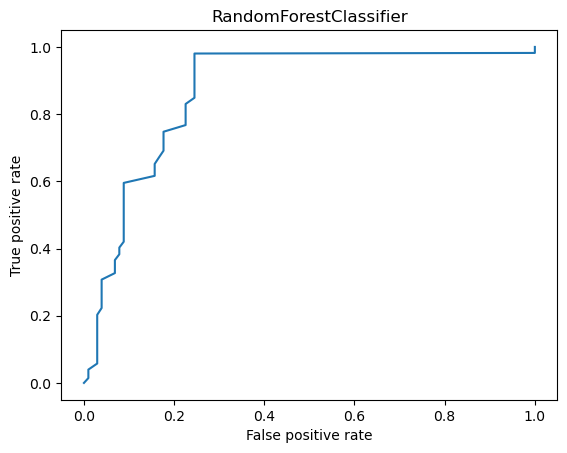

In [62]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

We can see that curve gives us positve indicator and model is predicting well around 90 %

In [63]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

Original  Predicted
0           21         21
1           38         37
2           16         16
3           15         15
4           40         40
...        ...        ...
5291        42         42
5292        31         31
5293        33         33
5294        49         49
5295        18         18

[5296 rows x 2 columns]

# So we can see above almost every value is matching well whatever is visible to us which mean we trained good model

# Thank You